In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

dseb_64_data_preparation_final_project_path = kagglehub.competition_download('dseb-64-data-preparation-final-project')

print('Data source import complete.')

100%|██████████| 361M/361M [00:06<00:00, 58.5MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(dseb_64_data_preparation_final_project_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_columns_description.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_sample_submission.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_installments_payments.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv
/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/ds

In [ ]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [ ]:
application_train = pd.read_csv("/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv", index_col=0)
test_df = pd.read_csv("/root/.cache/kagglehub/competitions/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_test.csv", index_col=0)

In [ ]:
test_df

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             Cash loans           M            Y               N   
1             Cash loans           F            Y               Y   
2             Cash loans           F            Y               N   
3             Cash loans           F            N               Y   
4             Cash loans           M            N               Y   
...                  ...         ...          ...             ...   
61497         Cash loans           M            Y               Y   
61498    Revolving loans           M            Y               Y   
61499         Cash loans           F            N               Y   
61500         Cash loans           M            N               Y   
61501         Cash loans           M            Y               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 2          207000.0    465457.5      52641.0   
1                 0          247500.0   1281712.5      48946.5   
2                 0          202500.0    495000.0      39109.5   
3                 0          247500.0    254700.0      24939.0   
4                 0          112500.0    308133.0      15862.5   
...             ...               ...         ...          ...   
61497             0          171000.0    521280.0      23089.5   
61498             2          450000.0    900000.0      45000.0   
61499             0          225000.0    202500.0      24030.0   
61500             0          121500.0    254700.0      30357.0   
61501             1          112500.0   1314117.0      38551.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0             418500.0   Unaccompanied  Commercial associate   
1            1179000.0   Unaccompanied  Commercial associate   
2             495000.0   Unaccompanied               Working   
3             225000.0   Unaccompanied         State servant   
4             234000.0   Unaccompanied               Working   
...                ...             ...                   ...   
61497         450000.0          Family             Pensioner   
61498         900000.0          Family               Working   
61499         202500.0          Family  Commercial associate   
61500         225000.0          Family             Pensioner   
61501        1147500.0          Family  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0      Secondary / secondary special               Married   
1                   Higher education  Single / not married   
2      Secondary / secondary special               Married   
3      Secondary / secondary special                 Widow   
4      Secondary / secondary special  Single / not married   
...                              ...                   ...   
61497               Higher education               Married   
61498  Secondary / secondary special               Married   
61499  Secondary / secondary special               Married   
61500  Secondary / secondary special               Married   
61501  Secondary / secondary special               Married   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        House / apartment                    0.009630      -13297   
1        House / apartment                    0.006852      -14778   
2        House / apartment                    0.035792      -17907   
3        House / apartment                    0.046220      -19626   
4        House / apartment                    0.018850      -20327   
...                    ...                         ...         ...   
61497    House / apartment                    0.018634      -23793   
61498  Municipal apartment                    0.003541      -18622   
61499    House / apartment                    0.028663      -12325   
61500    House / apartment                    0.003818      -23629   
61501    House / apartment                    0.007120      -17350   

       DAYS_EMPLOYED  DAYS_RE

# DATASET OVERVIEW

In [ ]:
application_train.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           F            N               N   
1       0         Cash loans           F            N               Y   
2       0         Cash loans           M            N               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          270000.0   1293502.5      35698.5        1129500.0   
1             0          135000.0    312682.5      29686.5         297000.0   
2             0          121500.0    513000.0      21865.5         513000.0   
3             0           99000.0    490495.5      27517.5         454500.0   
4             0          360000.0   1530000.0      42075.0        1530000.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           Family    State servant               Higher education   
1    Unaccompanied          Working  Secondary / secondary special   
2    Unaccompanied          Working  Secondary / secondary special   
3  Spouse, partner    State servant  Secondary / secondary special   
4    Unaccompanied    State servant               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married  House / apartment                    0.003541   
1        Civil marriage  House / apartment                    0.008019   
2  Single / not married  House / apartment                    0.028663   
3               Married  House / apartment                    0.035792   
4               Married  House / apartment                    0.003122   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -16765          -1188            -1186.0             -291          NaN   
1      -19005          -3039            -9833.0            -2437          NaN   
2      -19932          -3038            -4311.0            -3458          NaN   
3      -16941          -1588            -4970.0             -477          NaN   
4      -18850           -449            -4597.0            -2379          8.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                1                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0      Core staff              2.0                     1   
1           0        Laborers              2.0                     2   
2           0      Core staff              1.0                     2   
3           0        Laborers              2.0                     2   
4           0        Managers              2.0                     3   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            1                     MONDAY   
1                            2                  WEDNESDAY   
2                            2                   THURSDAY   
3                            2                  WEDNESDAY   
4                            3                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       11                           0   
1                       17                           0   
2                       11                           0   
3                       16                           0   
4                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0               

In [ ]:
print("Shape of the dataset:", application_train.shape)
print('-'*50)
print("Number of duplicated rows:", application_train.duplicated().sum())

Shape of the dataset: (246009, 122)
--------------------------------------------------
Number of duplicated rows: 0


In [ ]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS_RE

In [ ]:
#Check missing values
mis_val=application_train.isnull().sum()
mis_val_percent = 100*application_train.isnull().sum()/len(application_train)

mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(2)

mis_val_table_ren_columns.reset_index()

index  Missing Values  % of Total Values
0                COMMONAREA_MEDI          171930              69.89
1                 COMMONAREA_AVG          171930              69.89
2                COMMONAREA_MODE          171930              69.89
3       NONLIVINGAPARTMENTS_MEDI          170869              69.46
4       NONLIVINGAPARTMENTS_MODE          170869              69.46
5        NONLIVINGAPARTMENTS_AVG          170869              69.46
6             FONDKAPREMONT_MODE          168287              68.41
7          LIVINGAPARTMENTS_MODE          168197              68.37
8          LIVINGAPARTMENTS_MEDI          168197              68.37
9           LIVINGAPARTMENTS_AVG          168197              68.37
10                FLOORSMIN_MODE          166955              67.87
11                FLOORSMIN_MEDI          166955              67.87
12                 FLOORSMIN_AVG          166955              67.87
13              YEARS_BUILD_MODE          163684              66.54
14              YEARS_BUILD_MEDI          163684              66.54
15               YEARS_BUILD_AVG          163684              66.54
16                   OWN_CAR_AGE          162188              65.93
17                  LANDAREA_AVG          146130              59.40
18                 LANDAREA_MEDI          146130              59.40
19                 LANDAREA_MODE          146130              59.40
20             BASEMENTAREA_MEDI          144016              58.54
21              BASEMENTAREA_AVG          144016              58.54
22             BASEMENTAREA_MODE          144016              58.54
23                  EXT_SOURCE_1          138525              56.31
24            NONLIVINGAREA_MEDI          135944              55.26
25            NONLIVINGAREA_MODE          135944              55.26
26             NONLIVINGAREA_AVG          135944              55.26
27                ELEVATORS_MEDI          131209              53.34
28                ELEVATORS_MODE          131209              53.34
29                 ELEVATORS_AVG          131209              53.34
30            WALLSMATERIAL_MODE          125180              50.88
31               APARTMENTS_MODE          124984              50.80
32               APARTMENTS_MEDI          124984              50.80
33                APARTMENTS_AVG          124984              50.80
34                ENTRANCES_MODE          123949              50.38
35                 ENTRANCES_AVG          123949              50.38
36                ENTRANCES_MEDI          123949              50.38
37               LIVINGAREA_MEDI          123588              50.24
38               LIVINGAREA_MODE          123588              50.24
39                LIVINGAREA_AVG          123588              50.24
40                HOUSETYPE_MODE          123540              50.22
41                FLOORSMAX_MEDI          122533              49.81
42                 FLOORSMAX_AVG          122533              49.81
43                FLOORSMAX_MODE          122533              49.81
44   YEARS_BEGINEXPLUATATION_AVG          120082              48.81
45  YEARS_BEGINEXPLUATATION_MEDI          120082              48.81
46  YEARS_BEGINEXPLUATATION_MODE          120082              48.81
47                TOTALAREA_MODE          118819              48.30
48           EMERGENCYSTATE_MODE          116692              47.43
49               OCCUPATION_TYPE           77106              31.34
50                  EXT_SOURCE_3           48824              19.85
51    AMT_REQ_CREDIT_BUREAU_WEEK           33211              13.50
52     AMT_REQ_CREDIT_BUREAU_DAY           33211              13.50
53     AMT_REQ_CREDIT_BUREAU_MON           33211              13.50
54     AMT_REQ_CREDIT_BUREAU_QRT           33211              13.50
55    AMT_REQ_CREDIT_BUREAU_HOUR           33211              13.50
56    AMT_REQ_CREDIT_BUREAU_YEAR           33211              13.50
57               NAME_TYPE_SUITE            1046               0.43
58      DEF_30_

More than half of the total columns have missing values. Specifically, 49 columns have more than 47% missing, 40 columns exceed 50%, and 17 columns have over 65% missing. The highest number of missing values is in 3 columns COMMONAREA_MEDI, COMMONAREA_AVG, COMMONAREA_MODE, with a count of 171930, accounting for nearly 70%.\
Columns with too many missing values will be considered for dropping.

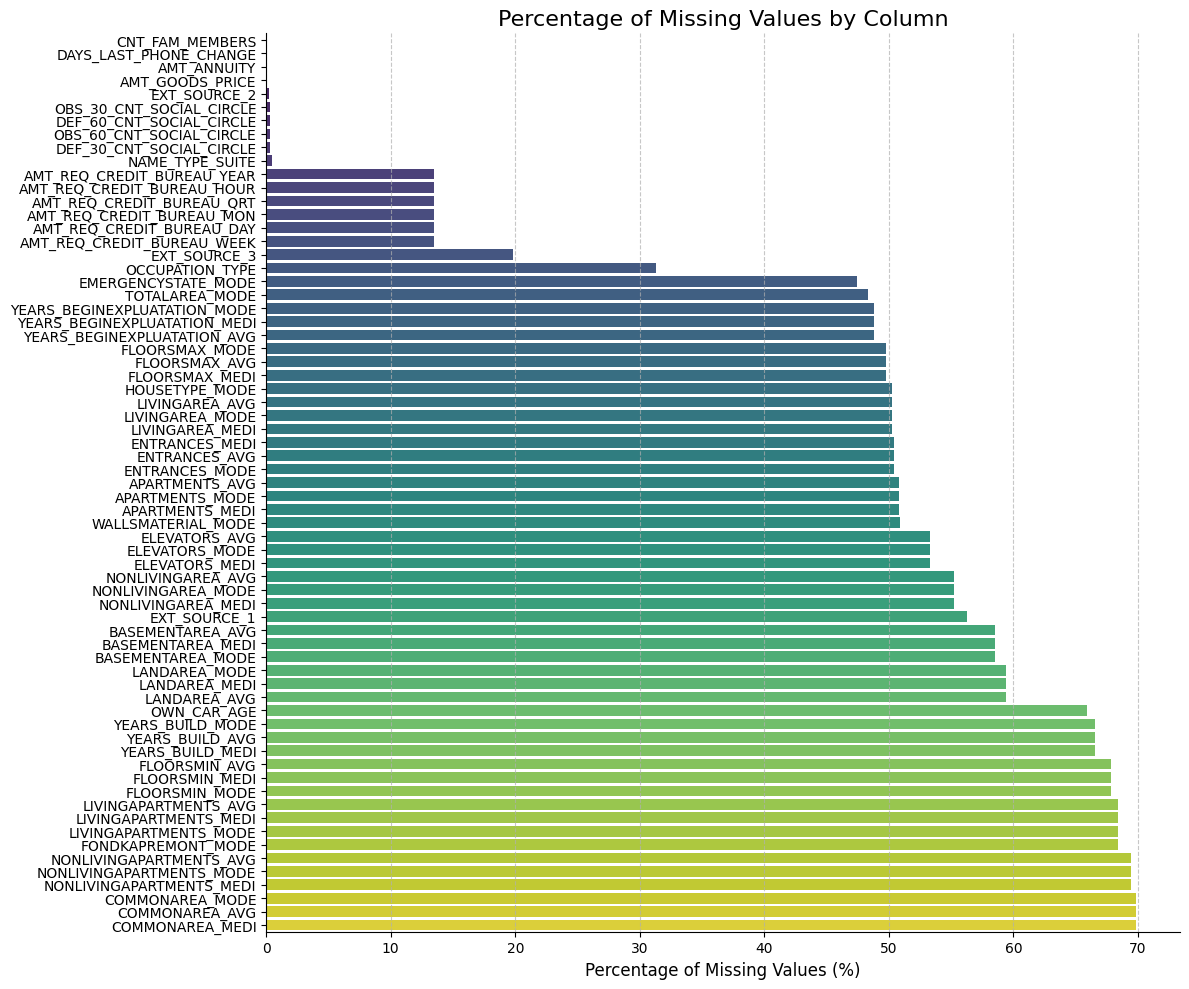

In [ ]:
plt.figure(figsize=(12, 10))
nan_data = mis_val_table_ren_columns['% of Total Values'].sort_values(ascending=True)
sns.barplot(x=nan_data.values, y=nan_data.index, palette="viridis")

plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#Check imbalance variables
column = [i for i in application_train.columns if '_ID_' not in i]
imbalance_ratios = {}

for i in column:
    val_count = application_train[i].value_counts()
    if application_train[i].dtype == 'object' or len(val_count) < 50:
        imbalance_ratios[i] = val_count.max() / val_count.min()
    else:
        imbalance_ratios[i] = None

for column, ratio in imbalance_ratios.items():
    if ratio is not None:
        print(f"Imbalance Ratio for column '{column}': {ratio:.7f}")
    else:
        print(f"Imbalance Ratio for column '{column}': None")

print('-'*90)
valid_imbalance_ratios = {k: v for k, v in imbalance_ratios.items() if v is not None}
max_imbalance_column = max(valid_imbalance_ratios, key=valid_imbalance_ratios.get)
max_imbalance_ratio = valid_imbalance_ratios[max_imbalance_column]
print(f"The column with the heaviest imbalance ratio is '{max_imbalance_column}' with ratio {max_imbalance_ratio:.7f}")

Imbalance Ratio for column 'TARGET': 11.3771886
Imbalance Ratio for column 'NAME_CONTRACT_TYPE': 9.4604558
Imbalance Ratio for column 'CODE_GENDER': 53952.0000000
Imbalance Ratio for column 'FLAG_OWN_CAR': 1.9347927
Imbalance Ratio for column 'FLAG_OWN_REALTY': 2.2728760
Imbalance Ratio for column 'CNT_CHILDREN': 172333.0000000
Imbalance Ratio for column 'AMT_INCOME_TOTAL': None
Imbalance Ratio for column 'AMT_CREDIT': None
Imbalance Ratio for column 'AMT_ANNUITY': None
Imbalance Ratio for column 'AMT_GOODS_PRICE': None
Imbalance Ratio for column 'NAME_TYPE_SUITE': 903.3727273
Imbalance Ratio for column 'NAME_INCOME_TYPE': 63465.0000000
Imbalance Ratio for column 'NAME_EDUCATION_TYPE': 1342.4769231
Imbalance Ratio for column 'NAME_FAMILY_STATUS': 157320.0000000
Imbalance Ratio for column 'NAME_HOUSING_TYPE': 240.7816979
Imbalance Ratio for column 'REGION_POPULATION_RELATIVE': None
Imbalance Ratio for column 'DAYS_BIRTH': None
Imbalance Ratio for column 'DAYS_EMPLOYED': None
Imbalance R

Imbalance indicates that one class or value is overwhelmingly dominant in the dataset
- The FLAG_MOBIL column has the heaviest imbalance ratio (246008)
- The imbalance ratio of TARGET column is 11.3771886

#EDA

##TARGET

The distribution of values in column: TARGET
0    226133
1     19876
Name: count, dtype: int64/n


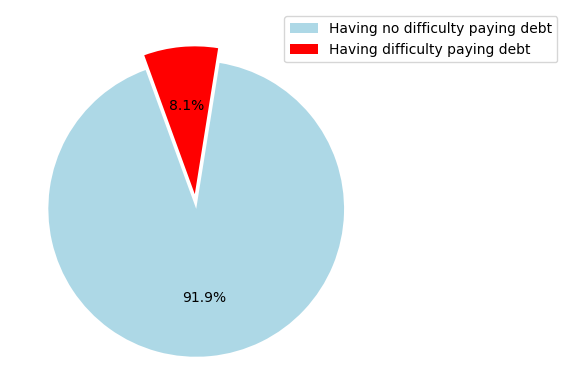

In [ ]:
print(f'The distribution of values in column: {application_train.TARGET.value_counts()}/n')
# Plot the TARGET column in a pie chart
fig, ax = plt.subplots()
ax.pie(application_train["TARGET"].value_counts(normalize= True), autopct='%1.1f%%', startangle=110, colors = ['lightblue','red'], explode = (0.1,0))
x = ['Having no difficulty paying debt', 'Having difficulty paying debt']
ax.legend(x, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

#plt.title('Dataset imbalance',fontsize = 26, weight = 'bold', pad = 20)
plt.show()

We observe that the number of TARGET = 1 accounts for only 8.1% of the entire dataset. This means that a large number of applicants (91,1%) are able to repay their loans on time. \\
However, this also indicates that the dataset is imbalanced, which can affect the accuracy of the prediction model as it tends to overlook minority values.

## CHECK CATEGORICAL COLUMNS

In [ ]:
cat = application_train.select_dtypes("object").columns
print(f'Number of categorical columns: {len(cat)}')
pd.concat([application_train[cat].nunique(), (application_train[cat].isnull().sum()/application_train.shape[0]).round(2)*100], axis=1)

Number of categorical columns: 16


0     1
NAME_CONTRACT_TYPE           2   0.0
CODE_GENDER                  3   0.0
FLAG_OWN_CAR                 2   0.0
FLAG_OWN_REALTY              2   0.0
NAME_TYPE_SUITE              7   0.0
NAME_INCOME_TYPE             8   0.0
NAME_EDUCATION_TYPE          5   0.0
NAME_FAMILY_STATUS           6   0.0
NAME_HOUSING_TYPE            6   0.0
OCCUPATION_TYPE             18  31.0
WEEKDAY_APPR_PROCESS_START   7   0.0
ORGANIZATION_TYPE           58   0.0
FONDKAPREMONT_MODE           4  68.0
HOUSETYPE_MODE               3  50.0
WALLSMATERIAL_MODE           7  51.0
EMERGENCYSTATE_MODE          2  47.0

In [ ]:
#Make a copy of dataset for plotting
plot_data = application_train.copy()

In [ ]:
def plot_categorical_columns(df, column_name):
  """Plots a categorical column in a stacked bar chart relative to 'TARGET'.

  Args:
    df: The DataFrame containing the data.
    column_name: The name of the categorical column to plot.
  """

  cross_tab = pd.crosstab(df[column_name], df['TARGET'])
  cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Count of values')
  plt.xticks(rotation=45)
  plt.legend(title='TARGET')
  plt.tight_layout()
  plt.show()


def calculate_default_proportion(df, column_name):
  """Calculates the proportion of target=1 (defaulters) for each value in a column.

  Args:
    df: The DataFrame containing the data.
    column_name: The name of the column to analyze.

  Returns:
      pandas.Series: A Series containing the proportion of defaulters for each value.
  """

  default_proportion = df.groupby(column_name)['TARGET'].mean().rename('Percent %')
  return f'The default proportion for each value in {default_proportion.round(4)*100}'

The default proportion for each value in NAME_CONTRACT_TYPE
Cash loans         8.36
Revolving loans    5.42
Name: Percent %, dtype: float64


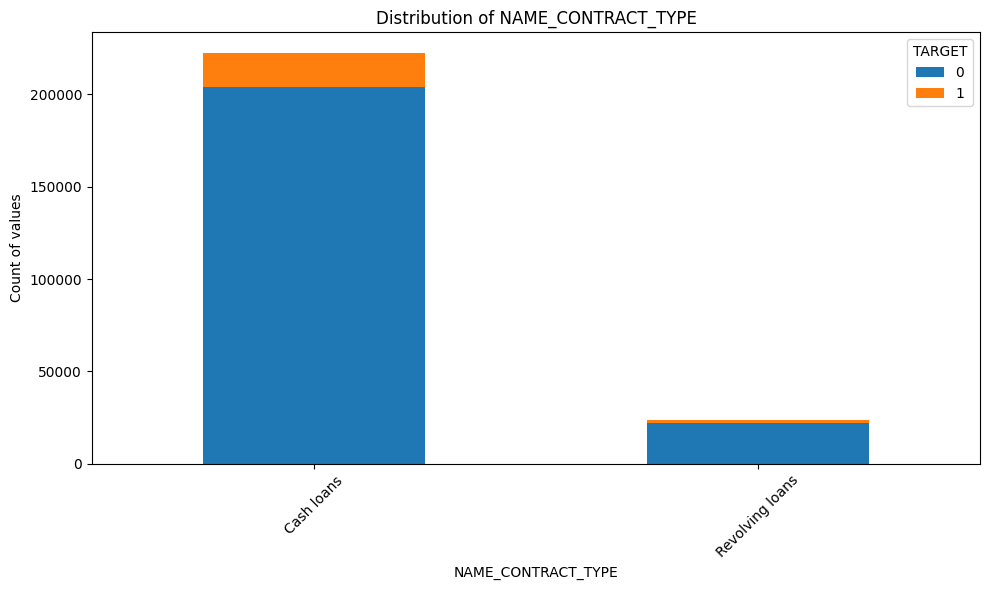

In [ ]:
print(calculate_default_proportion(application_train, 'NAME_CONTRACT_TYPE'))
plot_categorical_columns(application_train, 'NAME_CONTRACT_TYPE')

The default rate of the two types of contract types shows a slight difference, with cash loans having a default rate of 8.36%, which is nearly 3% higher than the other type.

The default proportion for each value in CODE_GENDER
F       7.00
M      10.15
XNA     0.00
Name: Percent %, dtype: float64


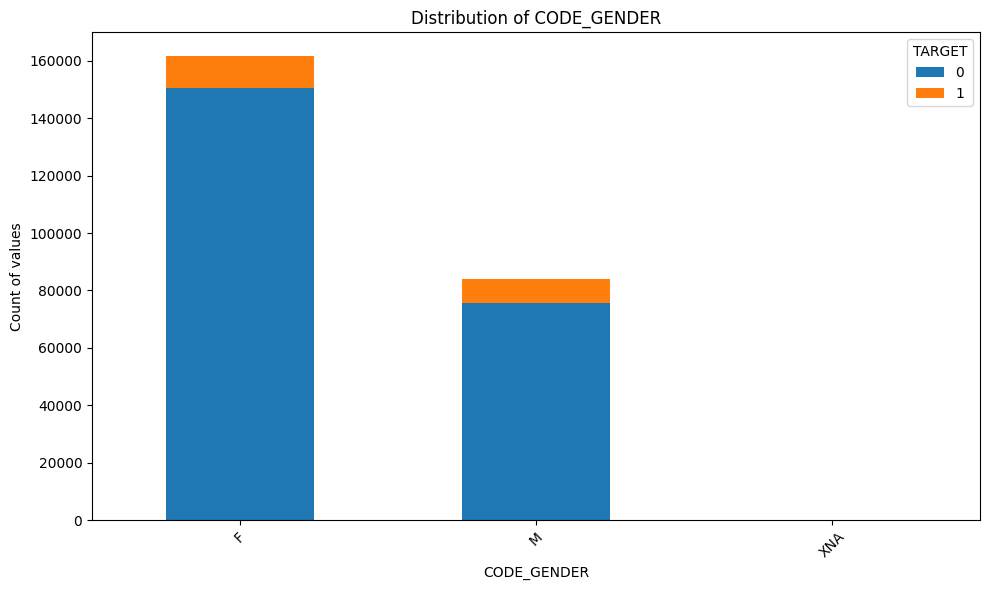

In [ ]:
print(calculate_default_proportion(plot_data, 'CODE_GENDER'))
plot_categorical_columns(plot_data, 'CODE_GENDER')

Males appear to have higher default-risk than females with 10.15% defaulters, compared with the rate of 7% in females, who accounts for nealy two-thirds of total applicants. There are 3 values in columns of gender so we have to investigate more.

In [ ]:
application_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      161856
M       84150
XNA         3
Name: count, dtype: int64

AS XNA appears with small value so we replace it with the mode in this columns, which is F.

In [ ]:
test_df.CODE_GENDER.value_counts()

CODE_GENDER
F      40592
M      20909
XNA        1
Name: count, dtype: int64

In [ ]:
application_train['CODE_GENDER'].replace('XNA', 'F', inplace=True)
test_df['CODE_GENDER'].replace('XNA', 'F', inplace=True)
application_train['CODE_GENDER'].value_counts()

CODE_GENDER
F    161859
M     84150
Name: count, dtype: int64

### Assets

The default proportion for each value in FLAG_OWN_CAR
N    8.53
Y    7.20
Name: Percent %, dtype: float64


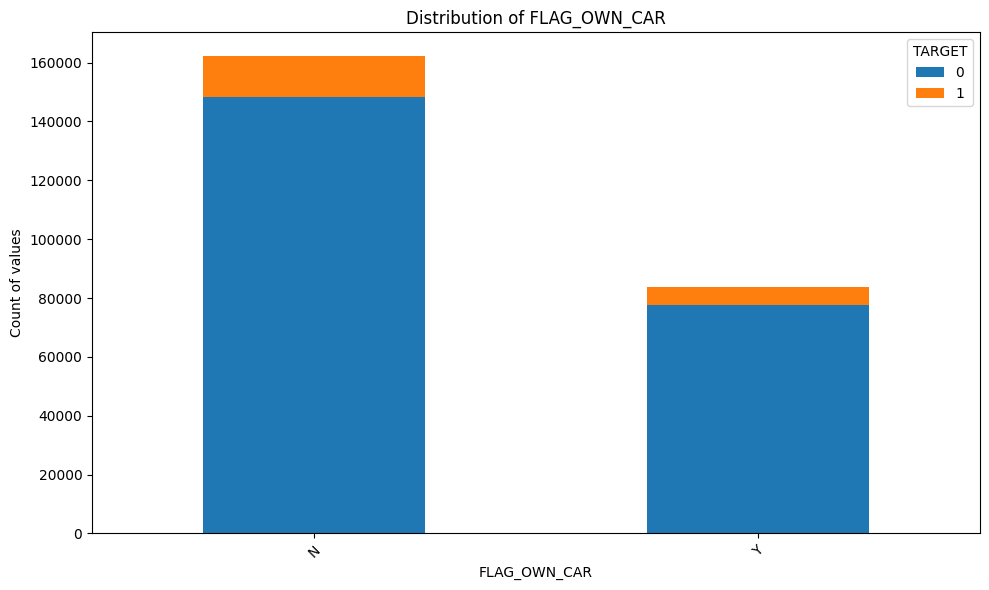

In [ ]:
print(calculate_default_proportion(plot_data, 'FLAG_OWN_CAR'))
plot_categorical_columns(plot_data, 'FLAG_OWN_CAR')

The default proportion for each value in FLAG_OWN_REALTY
N    8.37
Y    7.95
Name: Percent %, dtype: float64


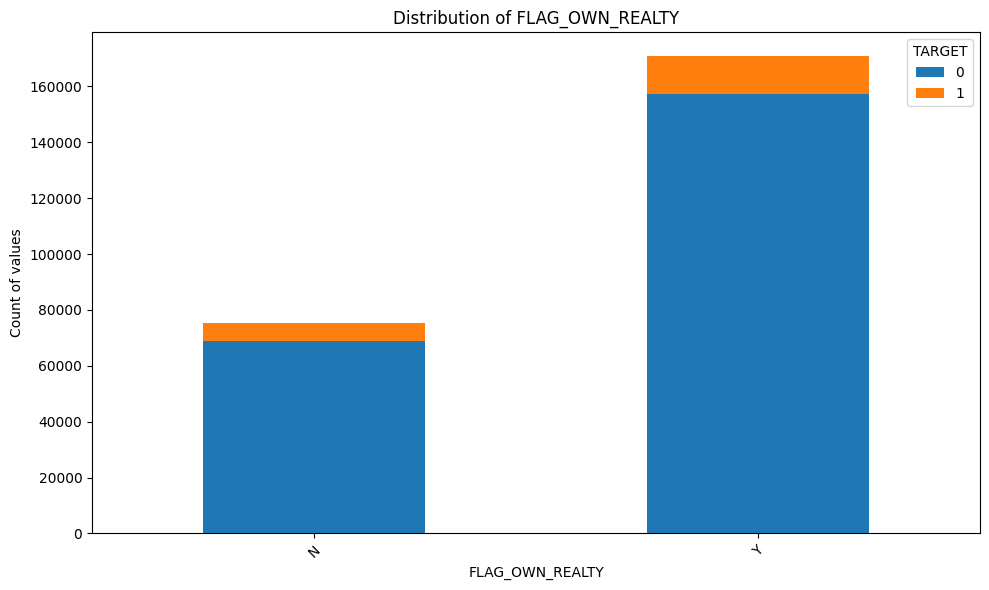

In [ ]:
print(calculate_default_proportion(plot_data, 'FLAG_OWN_REALTY'))
plot_categorical_columns(plot_data, 'FLAG_OWN_REALTY')

A larger number of customers own realty, while a greater number do not own a car. Although the unpaid rate among customers who do not own realty is higher, the difference is relatively small, at around 1%.

### Personal details

The default proportion for each value in NAME_TYPE_SUITE
Children           7.71
Family             7.59
Group of people    9.09
Other_A            9.26
Other_B            9.70
Spouse, partner    7.89
Unaccompanied      8.17
Name: Percent %, dtype: float64


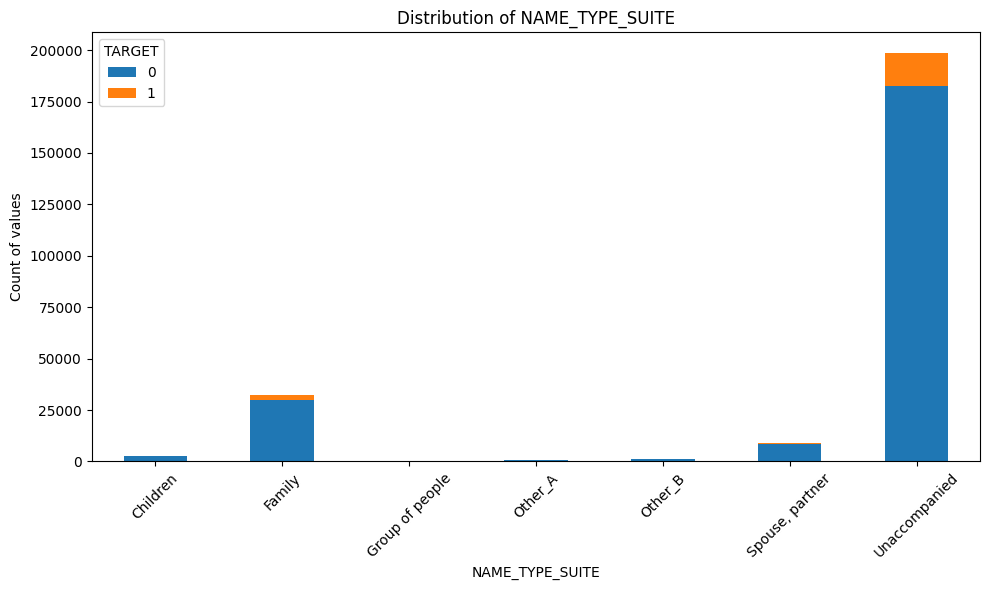

In [ ]:
print(calculate_default_proportion(plot_data, 'NAME_TYPE_SUITE'))
plot_categorical_columns(plot_data, 'NAME_TYPE_SUITE')

Most of the applicants were unaccompanied. The ones came with family, children and their partner have lower unpaid raid.

The default proportion for each value in NAME_EDUCATION_TYPE
Academic degree                   2.31
Higher education                  5.40
Incomplete higher                 8.60
Lower secondary                  10.96
Secondary / secondary special     8.93
Name: Percent %, dtype: float64


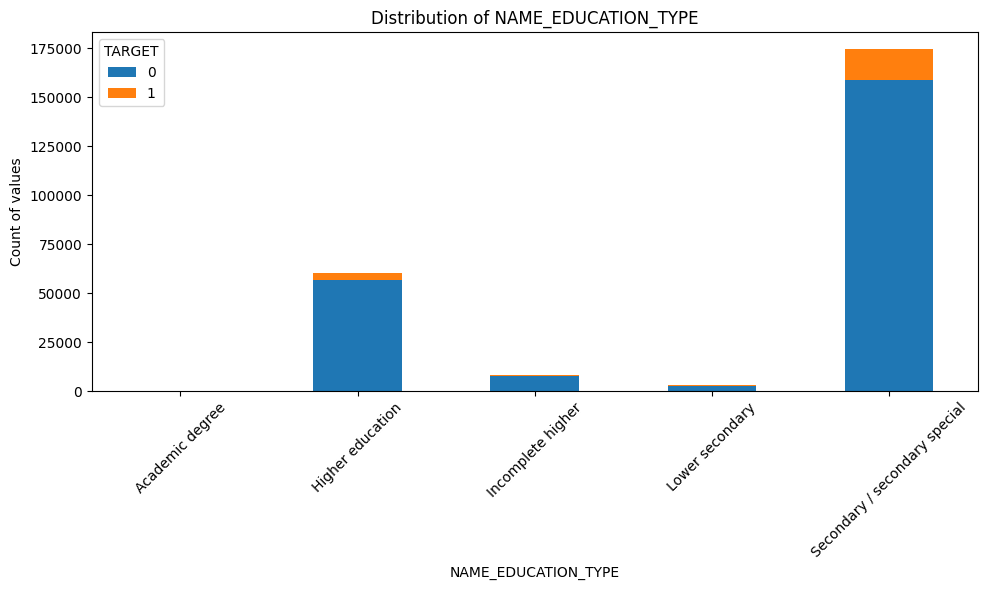

In [ ]:
print(calculate_default_proportion(plot_data, 'NAME_EDUCATION_TYPE'))
plot_categorical_columns(plot_data, 'NAME_EDUCATION_TYPE')

People with lower education degree (under higher) have higher default rate.

The default proportion for each value in NAME_INCOME_TYPE
Businessman              0.00
Commercial associate     7.57
Maternity leave         50.00
Pensioner                5.41
State servant            5.83
Student                  0.00
Unemployed              31.58
Working                  9.55
Name: Percent %, dtype: float64


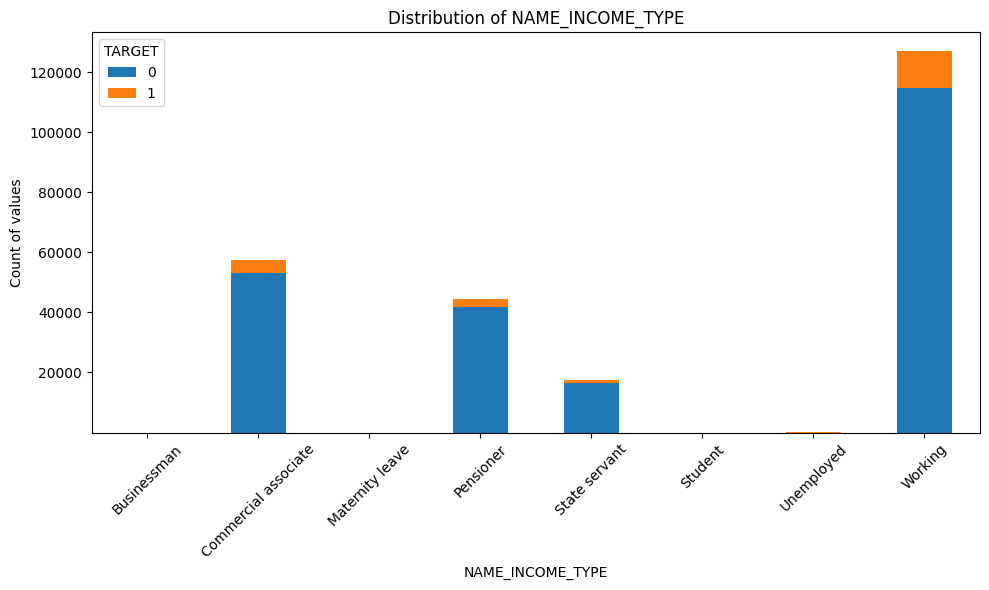

In [ ]:
print(calculate_default_proportion(plot_data, 'NAME_INCOME_TYPE'))
plot_categorical_columns(plot_data, 'NAME_INCOME_TYPE')

We observe that Unemployed and Maternity leave have a high default rate. However, the number of people with these two income types accounts for a very small proportion in total.

The default proportion for each value in NAME_FAMILY_STATUS
Civil marriage          9.95
Married                 7.57
Separated               8.23
Single / not married    9.80
Unknown                 0.00
Widow                   5.75
Name: Percent %, dtype: float64


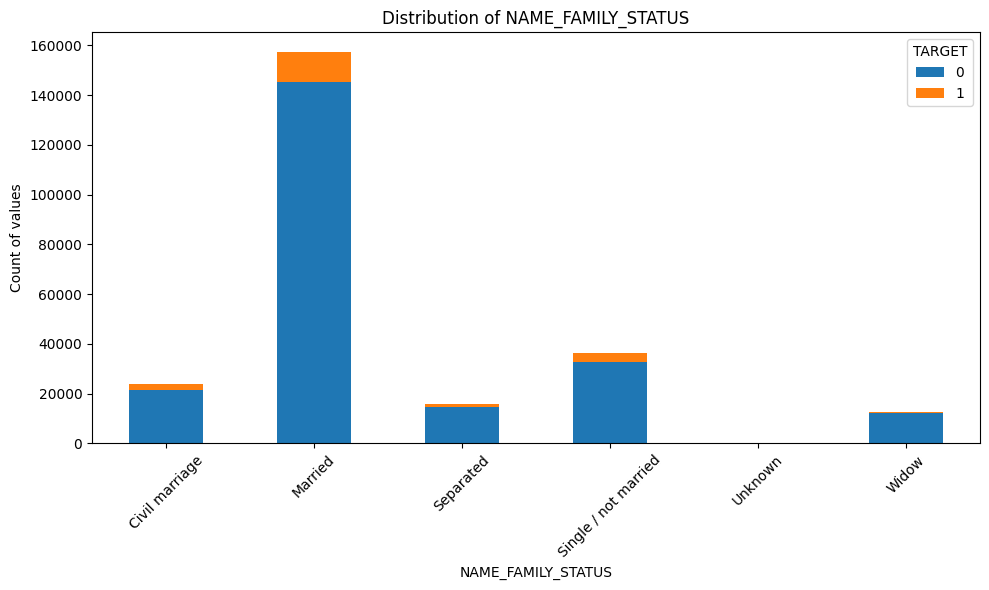

In [ ]:
print(calculate_default_proportion(plot_data, 'NAME_FAMILY_STATUS'))
plot_categorical_columns(plot_data, 'NAME_FAMILY_STATUS')

Single and Civil Marriage people have the highest unpaid rates (nearly 10%). Widow has the lowest, at 5.57%.

The default proportion for each value in NAME_HOUSING_TYPE
Co-op apartment         8.16
House / apartment       7.82
Municipal apartment     8.37
Office apartment        6.64
Rented apartment       12.08
With parents           11.62
Name: Percent %, dtype: float64


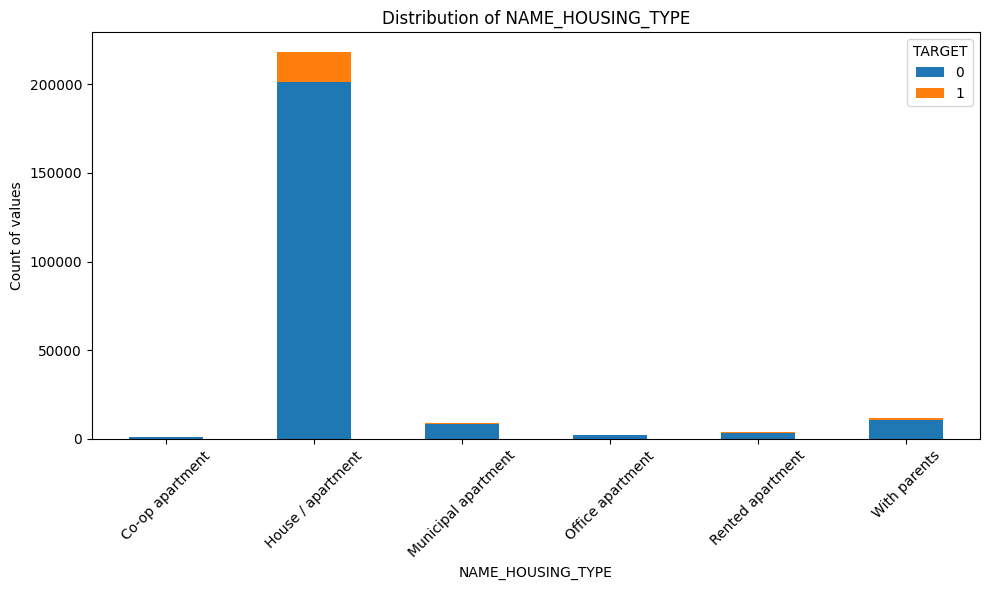

In [ ]:
print(calculate_default_proportion(plot_data, 'NAME_HOUSING_TYPE'))
plot_categorical_columns(plot_data, 'NAME_HOUSING_TYPE')

Most of the applicants live in a house/apartment. People who don't have an independent housing have higher default-risk.

The default proportion for each value in WEEKDAY_APPR_PROCESS_START
FRIDAY       8.22
MONDAY       7.82
SATURDAY     7.83
SUNDAY       7.86
THURSDAY     8.12
TUESDAY      8.32
WEDNESDAY    8.14
Name: Percent %, dtype: float64


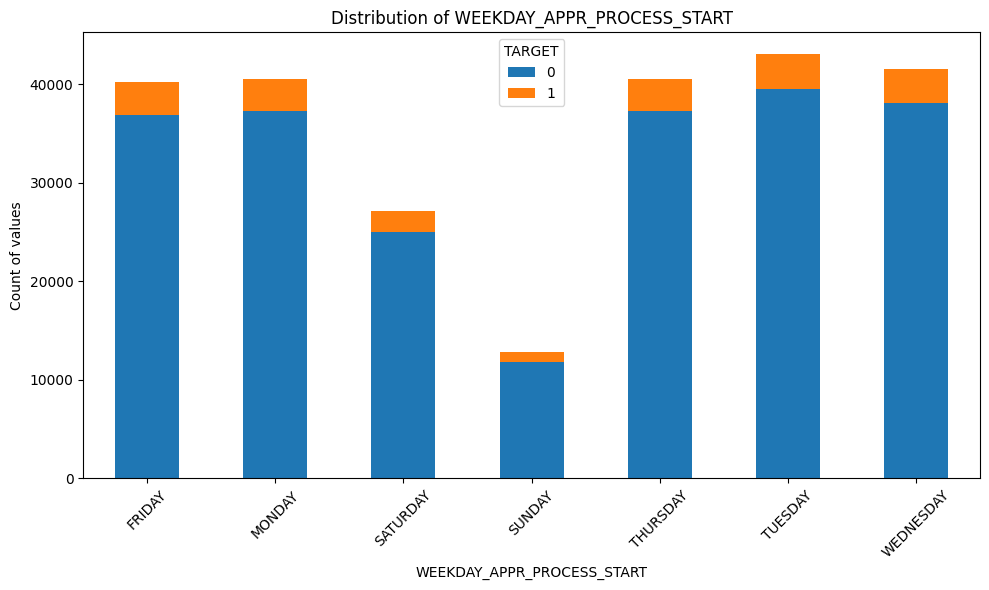

In [ ]:
print(calculate_default_proportion(plot_data, 'WEEKDAY_APPR_PROCESS_START'))
plot_categorical_columns(plot_data, 'WEEKDAY_APPR_PROCESS_START')

Loan applications are typically made during weekdays. However, the unpaid rate does not vary significantly between different days of the week.

The default proportion for each value in OCCUPATION_TYPE
Accountants               4.89
Cleaning staff            9.62
Cooking staff            10.60
Core staff                6.40
Drivers                  11.14
HR staff                  6.04
High skill tech staff     6.09
IT staff                  7.30
Laborers                 10.57
Low-skill Laborers       17.20
Managers                  6.32
Medicine staff            6.73
Private service staff     6.90
Realty agents             8.72
Sales staff               9.62
Secretaries               6.42
Security staff           10.68
Waiters/barmen staff     11.30
Name: Percent %, dtype: float64


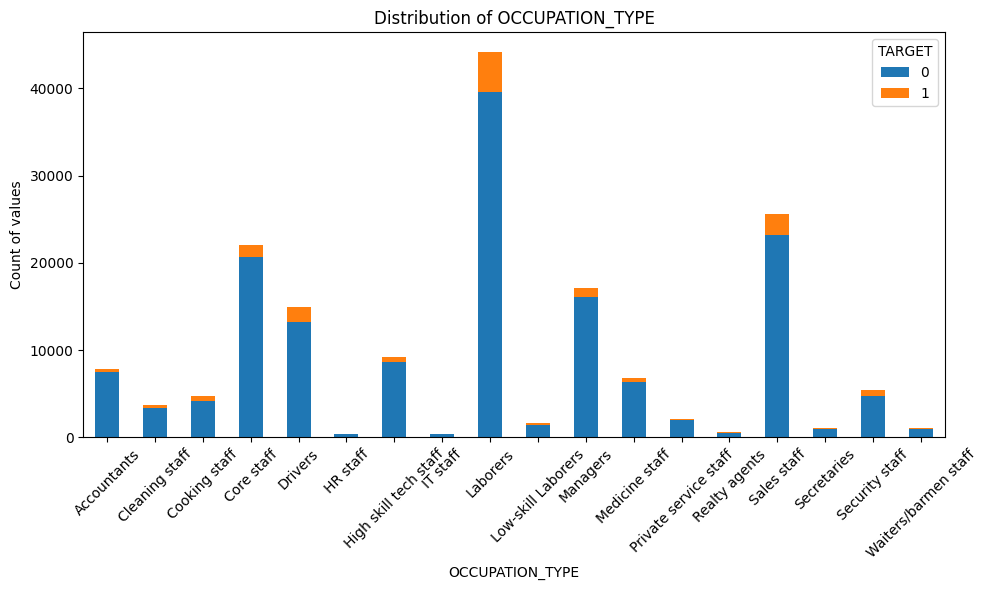

In [ ]:
print(calculate_default_proportion(plot_data, 'OCCUPATION_TYPE'))
plot_categorical_columns(plot_data, 'OCCUPATION_TYPE')

Lower-skill labors and manual labors tend to have higher unpaid rate, compared with officers.

The default proportion for each value in ORGANIZATION_TYPE
Advertising                8.26
Agriculture               10.46
Bank                       5.25
Business Entity Type 1     8.20
Business Entity Type 2     8.71
Business Entity Type 3     9.34
Cleaning                  10.73
Construction              11.73
Culture                    5.08
Electricity                6.03
Emergency                  6.42
Government                 6.67
Hotel                      6.28
Housing                    7.42
Industry: type 1          11.76
Industry: type 10          4.82
Industry: type 11          8.78
Industry: type 12          2.98
Industry: type 13          8.93
Industry: type 2           8.04
Industry: type 3          10.47
Industry: type 4          10.50
Industry: type 5           6.58
Industry: type 6           7.29
Industry: type 7           7.86
Industry: type 8           9.09
Industry: type 9           6.85
Insurance                  6.74
Kindergarten               7.00
Legal Service

<Axes: xlabel='ORGANIZATION_TYPE'>

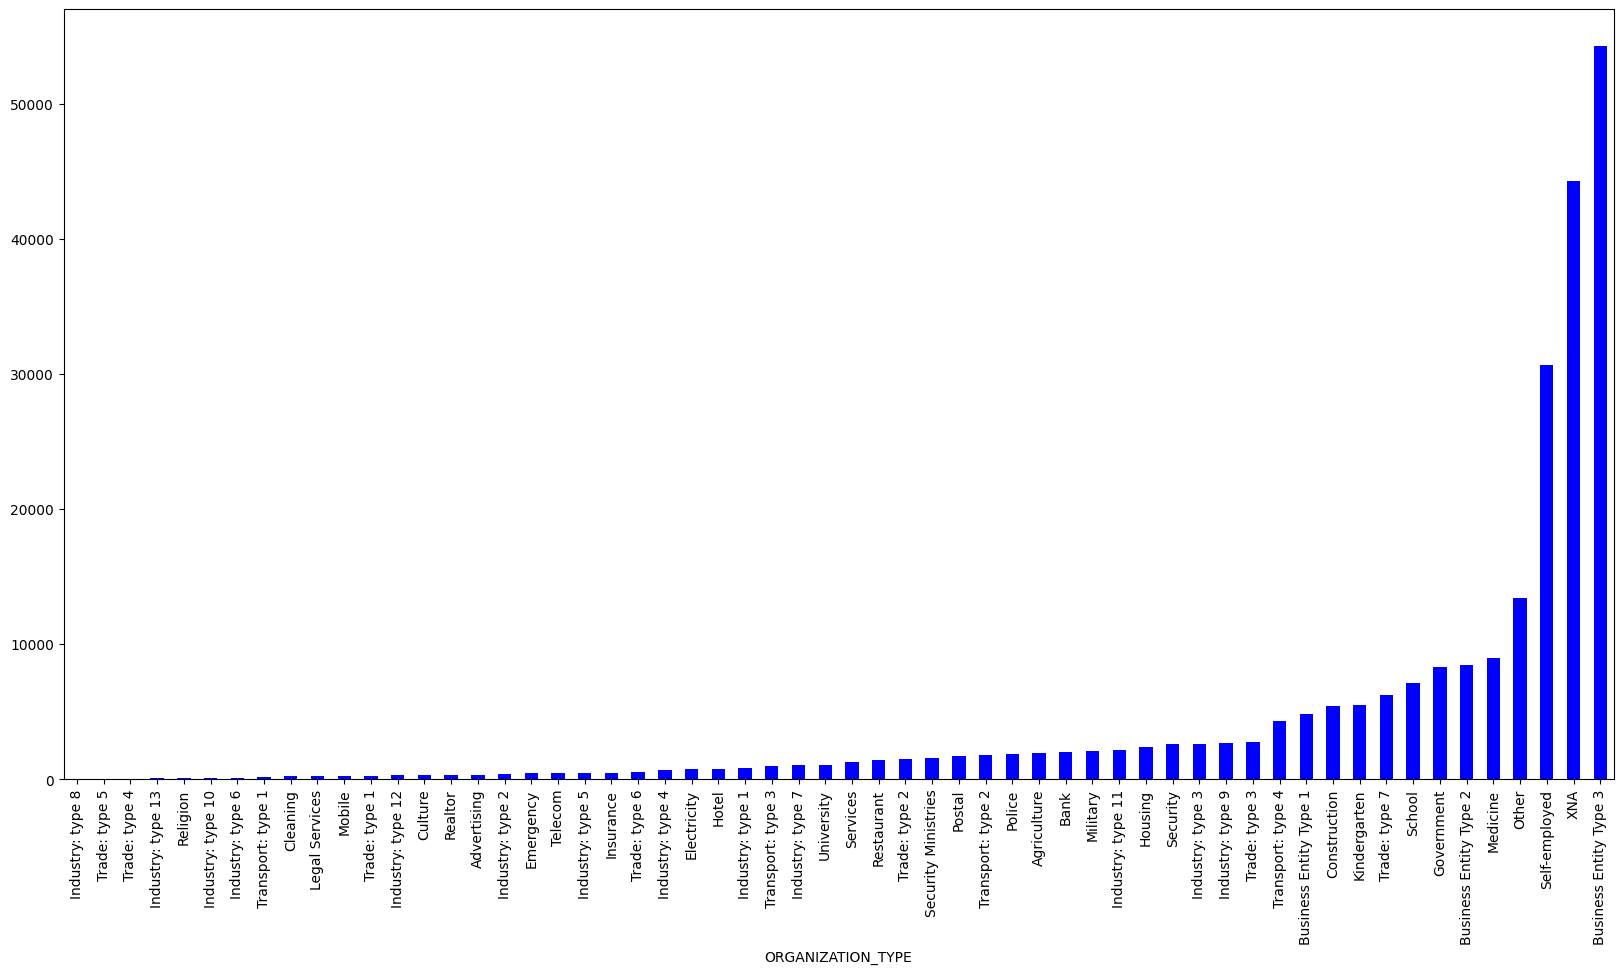

In [ ]:
print(calculate_default_proportion(plot_data, 'ORGANIZATION_TYPE'))
plot_data.ORGANIZATION_TYPE.value_counts().sort_values().plot(kind='bar', figsize=(20,10),color='blue')

The XNA value have a high number so we have to investigate more whether it should be replaced with NaN

In [ ]:
plot_data[plot_data['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].value_counts().sort_values()

NAME_INCOME_TYPE
Unemployed       19
Pensioner     44305
Name: count, dtype: int64

It is reasonble that people with pensioner or unemployment belong to no organization.

Now come to the 4 categorical columns containing the most missing values. I will only check the proportion of defaulters on these columns to decide whether it should be dropped or not.

In [ ]:
for col in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']:
    print(calculate_default_proportion(plot_data, col))
    print('-'*50)

The default proportion for each value in FONDKAPREMONT_MODE
not specified            7.31
org spec account         5.88
reg oper account         6.98
reg oper spec account    6.57
Name: Percent %, dtype: float64
--------------------------------------------------
The default proportion for each value in HOUSETYPE_MODE
block of flats      6.97
specific housing    9.97
terraced house      9.00
Name: Percent %, dtype: float64
--------------------------------------------------
The default proportion for each value in WALLSMATERIAL_MODE
Block           7.06
Mixed           7.67
Monolithic      4.82
Others          8.78
Panel           6.38
Stone, brick    7.37
Wooden          9.94
Name: Percent %, dtype: float64
--------------------------------------------------
The default proportion for each value in EMERGENCYSTATE_MODE
No      6.98
Yes    10.09
Name: Percent %, dtype: float64
--------------------------------------------------


## CHECK NUMERICAL COLUMNS


In [ ]:
numerical = application_train.select_dtypes(exclude='object').columns.tolist()
application_train[numerical].nunique().sort_values()

TARGET                               2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
LIVE_REGION_NOT_WORK_REGION          2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_2                      2
FLAG_DOCUMENT_10                     2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_21                     2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_18                     2
FLAG_EMAIL                           2
FLAG_PHONE                           2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMP_PHONE                       2
FLAG_MOBIL                           2
FLAG_DOCUMENT_17                     2
REGION_RATING_CLIENT_W_CITY          3
REGION_RATING_CLIENT                 3
AMT_REQ_CREDIT_BUREAU_HOUR           4
AMT_REQ_CREDIT_BUREAU_DAY            8
AMT_REQ_CREDIT_BUREAU_WEEK           9
DEF_60_CNT_SOCIAL_CIRCLE             9
DEF_30_CNT_SOCIAL_CIRCLE             9
AMT_REQ_CREDIT_BUREAU_QRT           11
CNT_CHILDREN                        14
CNT_FAM_MEMBERS                     16
AMT_REQ_CREDIT_BUREAU_YEAR          22
AMT_REQ_CREDIT_BUREAU_MON           23
HOUR_APPR_PROCESS_START             24
FLOORSMIN_MODE                      25
FLOORSMAX_MODE                      25
ELEVATORS_MODE                      26
ENTRANCES_MODE                      30
OBS_60_CNT_SOCIAL_CIRCLE            32
OBS_30_CNT_SOCIAL_CIRCLE            33
ENTRANCES_MEDI                      45
ELEVATORS_MEDI                      46
FLOORSMIN_MEDI                      47
FLOORSMAX_MEDI                      48
OWN_CAR_AGE                         59
REGION_POPULATION_RELATIVE          81
YEARS_BUILD_AVG                    148
YEARS_BUILD_MEDI                   150
YEARS_BUILD_MODE                   154
NONLIVINGAPARTMENTS_MODE           157
NONLIVINGAPARTMENTS_MEDI           200
YEARS_BEGINEXPLUATATION_MODE       212
YEARS_BEGINEXPLUATATION_MEDI       235
ELEVATORS_AVG                      250
YEARS_BEGINEXPLUATATION_AVG        267
ENTRANCES_AVG                      273
FLOORSMIN_AVG                      291
NONLIVINGAPARTMENTS_AVG            365
FLOORSMAX_AVG                      384
LIVINGAPARTMENTS_MODE              719
APARTMENTS_MODE                    743
EXT_SOURCE_3                       807
AMT_GOODS_PRICE                    883
LIVINGAPARTMENTS_MEDI             1069
APARTMENTS_MEDI                   1123
LIVINGAPARTMENTS_AVG              1801
AMT_INCOME_TOTAL                  2185
APARTMENTS_AVG                    2257
COMMONAREA_MODE                   2988
COMMONAREA_AVG                    3032
COMMONAREA_MEDI                   3058
NONLIVINGAREA_AVG                 3146
NONLIVINGAREA_MEDI                3173
NONLIVINGAREA_MODE                3173
LANDAREA_AVG                      3415
LANDAREA_MEDI                     3454
LANDAREA_MODE                     3463
BASEMENTAREA_MEDI                 3682
BASEMENTAREA_AVG                  3692
DAYS_LAST_PHONE_CHANGE            3737
BASEMENTAREA_MODE                 3748
TOTALAREA_MODE                    4994
LIVINGAREA_AVG                    5064
LIVINGAREA_MEDI                   5146
LIVINGAREA_MODE                   5154
AMT_CREDIT                        5267
DAYS_ID_PUBLISH                   6140
DAYS_EMPLOYED                    12078
AMT_ANNUITY                      13150
DAYS_REGISTRATION                15367
DAYS_BIRTH            

In [ ]:
#Make a dataframe for columns with dummy value
dummy = []
for col in numerical:
    if application_train[col].nunique() == 2:
        dummy.append(col)

In [ ]:
numerical = application_train.select_dtypes(exclude='object').columns.tolist()

num_df =  application_train[numerical].drop(columns=dummy)
dummy_df=application_train[dummy]

In [ ]:
def check_null_continuous(df):
    """
    Checks for null values in continuous columns of a DataFrame and prints the results.
    Args:
        df: The input DataFrame.
    Returns: None
    """
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    null_counts = df[numerical_cols].isnull().sum()
    null_percentages = (null_counts / len(df)) * 100

    null_summary = pd.DataFrame({'Column': numerical_cols,
                                 'Null Count': null_counts,
                                 'Null Percentage': null_percentages})

    print(null_summary[null_summary['Null Percentage'] > 0])  #Show columns with nulls


check_null_continuous(application_train)

                                                    Column  Null Count  \
AMT_ANNUITY                                    AMT_ANNUITY          10   
AMT_GOODS_PRICE                            AMT_GOODS_PRICE         224   
OWN_CAR_AGE                                    OWN_CAR_AGE      162188   
CNT_FAM_MEMBERS                            CNT_FAM_MEMBERS           1   
EXT_SOURCE_1                                  EXT_SOURCE_1      138525   
EXT_SOURCE_2                                  EXT_SOURCE_2         529   
EXT_SOURCE_3                                  EXT_SOURCE_3       48824   
APARTMENTS_AVG                              APARTMENTS_AVG      124984   
BASEMENTAREA_AVG                          BASEMENTAREA_AVG      144016   
YEARS_BEGINEXPLUATATION_AVG    YEARS_BEGINEXPLUATATION_AVG      120082   
YEARS_BUILD_AVG                            YEARS_BUILD_AVG      163684   
COMMONAREA_AVG                              COMMONAREA_AVG      171930   
ELEVATORS_AVG                         

In [ ]:
dummy_df.head()

TARGET  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0       0           1               1                0                 1   
1       0           1               1                0                 1   
2       0           1               1                0                 1   
3       0           1               1                1                 1   
4       0           1               1                1                 1   

   FLAG_PHONE  FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  \
0           1           0                           0   
1           0           0                           0   
2           0           0                           0   
3           1           0                           0   
4           0           0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       1                        1   
3                       0                       0                        0   
4                       0                       1                        1   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                1                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0                 0  
1                 0                 0                 0                 0  
2                 0                 0                 0                 0  
3                 0                 0                 0                 0  
4                 0                 0                 0                 0

In [ ]:
num_df.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          270000.0   1293502.5      35698.5        1129500.0   
1             0          135000.0    312682.5      29686.5         297000.0   
2             0          121500.0    513000.0      21865.5         513000.0   
3             0           99000.0    490495.5      27517.5         454500.0   
4             0          360000.0   1530000.0      42075.0        1530000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.003541      -16765          -1188            -1186.0   
1                    0.008019      -19005          -3039            -9833.0   
2                    0.028663      -19932          -3038            -4311.0   
3                    0.035792      -16941          -1588            -4970.0   
4                    0.003122      -18850           -449            -4597.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             -291          NaN              2.0                     1   
1            -2437          NaN              2.0                     2   
2            -3458          NaN              1.0                     2   
3             -477          NaN              2.0                     2   
4            -2379          8.0              2.0                     3   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  EXT_SOURCE_1  \
0                            1                       11      0.311267   
1                            2                       17           NaN   
2                            2                       11           NaN   
3                            2                       16           NaN   
4                            3                       16           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.622246           NaN          0.0959            0.0529   
1      0.650442           NaN             NaN               NaN   
2      0.322738           NaN             NaN               NaN   
3      0.354225      0.621226             NaN               NaN   
4      0.714279      0.540654             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9851            0.796          0.0605   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.08         0.0345         0.2917         0.3333         0.013   
1            NaN            NaN            NaN            NaN           NaN   
2            NaN            NaN            NaN            NaN           NaN   
3            NaN            NaN            NaN            NaN           NaN   
4            NaN            NaN            NaN            NaN           NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0773          0.0549                   0.0039   
1                   NaN             NaN                      NaN   
2                   NaN             NaN                      NaN   
3                   NaN             NaN                      NaN   
4                   NaN             NaN                      NaN   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0098           0.0924             0.0538   
1                NaN              NaN                NaN   
2                NaN              NaN                NaN   
3                NaN              NaN                NaN   
4                NaN              NaN                NaN   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9851             0.80

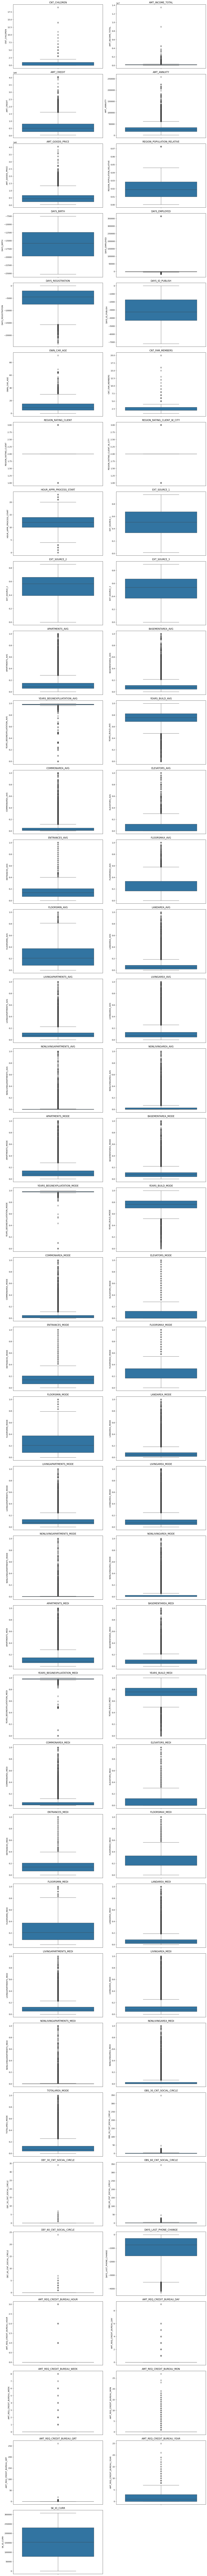

In [ ]:
def draw_boxplot(df, cols_per_row=2):
    """
    Draws box plots for all numerical columns in a DataFrame.

    Args:
        df: The input DataFrame.
        cols_per_row: The number of columns to display per row in the plot.
    """
    num_cols = len(df.columns)
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(df.columns):
        if i < num_cols:  # Check to prevent errors if num_cols is not perfectly divisible by cols_per_row
            sns.boxplot(y=df[col], ax=axes[i])
            axes[i].set_title(col)

    for j in range(i+1, len(axes)): # Hide unused subplots
      fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

draw_boxplot(num_df)

In [ ]:
num_df.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  246009.000000      2.460090e+05  2.460090e+05  245999.000000   
mean        0.416229      1.684589e+05  5.996410e+05   27120.238129   
std         0.720664      1.045297e+05  4.030980e+05   14510.634712   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16506.000000   
50%         0.000000      1.462500e+05  5.147775e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34654.500000   
max        19.000000      1.350000e+07  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     2.457850e+05               246009.000000  246009.000000   
mean      5.389827e+05                    0.020855  -16038.946343   
std       3.700520e+05                    0.013818    4361.265483   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15755.000000   
75%       6.795000e+05                    0.028663  -12418.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE  \
count  246009.000000      246009.000000    246009.000000  83821.000000   
mean    63852.612441       -4985.222248     -2992.974509     12.042293   
std    141306.376949        3521.391396      1509.081061     11.914722   
min    -17912.000000      -23416.000000     -7197.000000      0.000000   
25%     -2758.000000       -7482.000000     -4297.000000      5.000000   
50%     -1212.000000       -4504.000000     -3251.000000      9.000000   
75%      -288.000000       -2006.000000     -1719.000000     15.000000   
max    365243.000000           0.000000         0.000000     91.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    246008.000000         246009.000000                246009.000000   
mean          2.152637              2.052616                     2.031682   
std           0.908735              0.509004                     0.502704   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  \
count            246009.000000  107484.000000  2.454800e+05  197185.000000   
mean                 12.063372       0.502462  5.143854e-01       0.511034   
std                   3.268045       0.210813  1.910533e-01       0.194837   
min                   0.000000       0.014568  8.173617e-08       0.000527   
25%                  10.000000       0.334376  3.922228e-01       0.370650   
50%                  12.000000       0.506427  5.658916e-01       0.537070   
75%                  14.000000       0.675074  6.637452e-01       0.669057   
max                  23.000000       0.951624  8.549997e-01       0.896010   

       APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count   121025.000000     101993.000000                125927.000000   
mean         0.117422          0.088463                     0.977713   
std          0.108164          0.082471                     0.059673   
min          0.000000          0.000000                     0.000000   
25%          0.057700          0.044200                     0.976700   
50%          0.087600          0.076300                     0.982100   
75%          0.148500          0.112100                     0.986600   
max          1.000000          1.000000                     1.000000   

       YEARS_BUILD_AVG  COMMONARE

There are many columns with minimal IQR and many outliers.
* CNT_children has outliers of families with more than 5 childs. CNT_FAM_MEMBERS also shows that most applicants have fewer than 5 family members.
* DAYS_EMPLOYED has an outlier at a point above 350,000 while most of its values fall under 0. DAYS_REGISTRATION has exception values lying under -15,000 (approximately older than 41 years). All columns counting days
have negative value, so it may have set the day of this sheet as 0.
* The AMT_INCOME_TOTAL column has a very narrow IQR and many outliers above the upper bound of the IQR. The AMT_ANNUITY column faces a similar situation. This indicates that applicants who apply for loans often fall within a narrow income range and most of them cannot afford a large annuity.
* OWN_CAR_AGE shows that median car age appears to be relatively low, possibly around 5-10 years. However, there are extreme values such as 80, show car ages exceeding 80 years. This might need further investigation.
* Most of columns containing clients' building information  have narrow IQR and capture many outliers. We consider dropping these features.
* There appears very extreme values in columns OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE.

In [ ]:
#find data anomalies
application_train['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    44324
-200         126
-199         124
-224         124
-196         118
           ...  
-10092         1
-16265         1
-14478         1
-10714         1
-8694          1
Name: count, Length: 12078, dtype: int64

In [ ]:
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
test_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

### Age

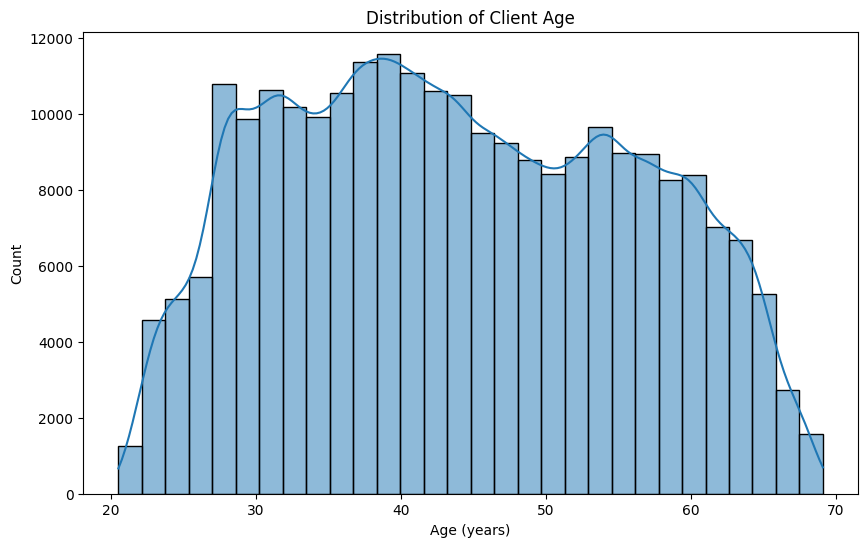

In [ ]:
#plot the distribution of age of clients

plt.figure(figsize=(10, 6))
sns.histplot(application_train['DAYS_BIRTH'] / -365, bins=30, kde=True)
plt.title('Distribution of Client Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

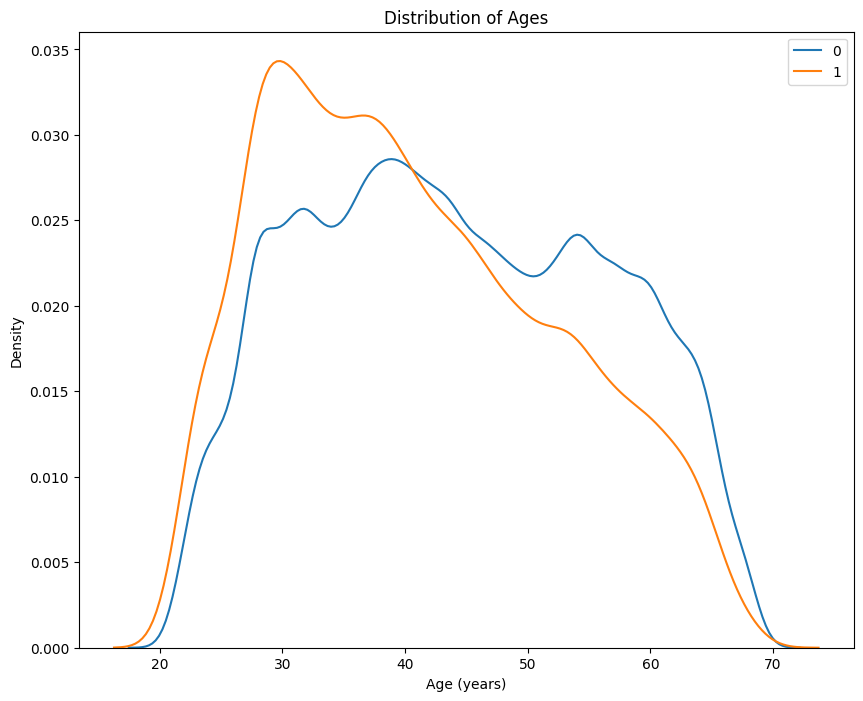

In [ ]:
plt.figure(figsize = (10, 8))
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = '0')
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = '1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Ages');

The ages range from 27 to 45 has the highest number of loan applications. However, the highest unpaid rate is observed in the group around the age of 30, followed by those near 40.

In [ ]:
np.linspace(20,70,num=11)
age_df=application_train[['TARGET','DAYS_BIRTH']]
age_df['YEARS_BIRTH']=age_df['DAYS_BIRTH']/-365

# Bin the age data
age_df['YEARS_BINNED']=pd.cut(age_df['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
age_df.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       0      -16765    45.931507  (45.0, 50.0]
1       0      -19005    52.068493  (50.0, 55.0]
2       0      -19932    54.608219  (50.0, 55.0]
3       0      -16941    46.413699  (45.0, 50.0]
4       0      -18850    51.643836  (50.0, 55.0]
5       0      -20099    55.065753  (55.0, 60.0]
6       0      -14469    39.641096  (35.0, 40.0]
7       0      -10197    27.936986  (25.0, 30.0]
8       0      -14086    38.591781  (35.0, 40.0]
9       0      -14583    39.953425  (35.0, 40.0]

In [ ]:
age_groups  = age_df.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.124009  -8532.664917    23.377164
(25.0, 30.0]  0.111557 -10155.047837    27.822049
(30.0, 35.0]  0.102045 -11853.509209    32.475368
(35.0, 40.0]  0.088879 -13708.826719    37.558429
(40.0, 45.0]  0.078780 -15497.591047    42.459154
(45.0, 50.0]  0.075446 -17323.275616    47.461029
(50.0, 55.0]  0.066702 -19197.510778    52.595920
(55.0, 60.0]  0.055748 -20984.759016    57.492490
(60.0, 65.0]  0.052246 -22776.998947    62.402737
(65.0, 70.0]  0.038935 -24290.054017    66.548093

Text(0.5, 1.0, 'Failure to Repay by Age Group')

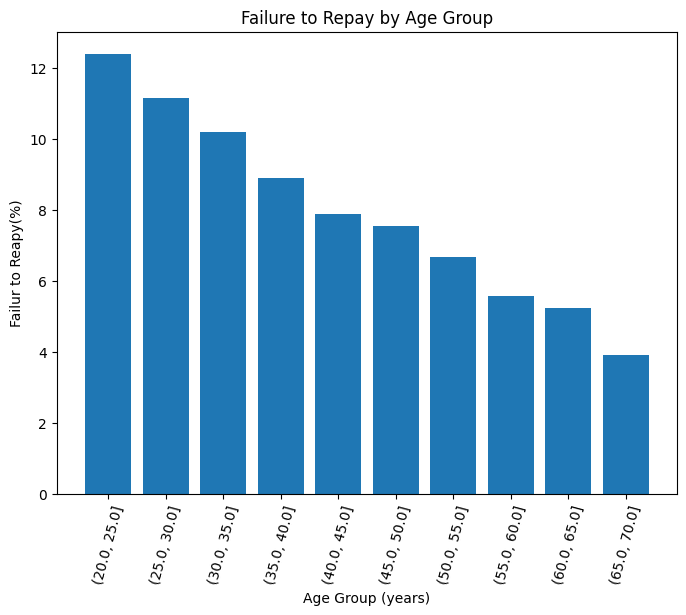

In [ ]:
plt.figure(figsize=(8,6))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75);
plt.xlabel('Age Group (years)');
plt.ylabel('Failur to Reapy(%)')
plt.title('Failure to Repay by Age Group')

* Younger people are less likely to repay their loans.
* Those aged 20-25, 25-30 and 30-35 each failed to repay their loans by more than 10 percent, while those aged 55-60, 60-65 and 65-70 each failed to repay their loans by less than 5 percent.

### Income, Credit, Annuity

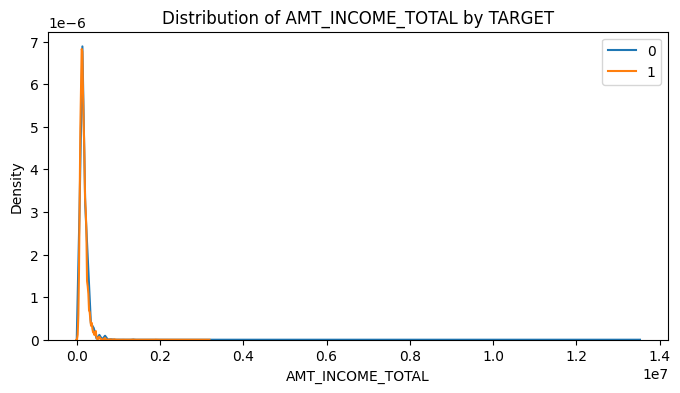

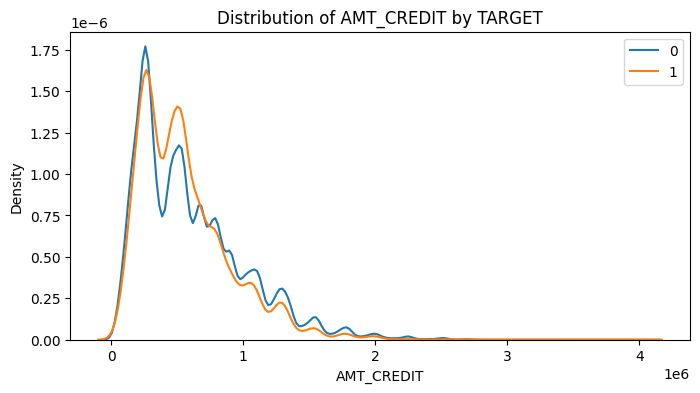

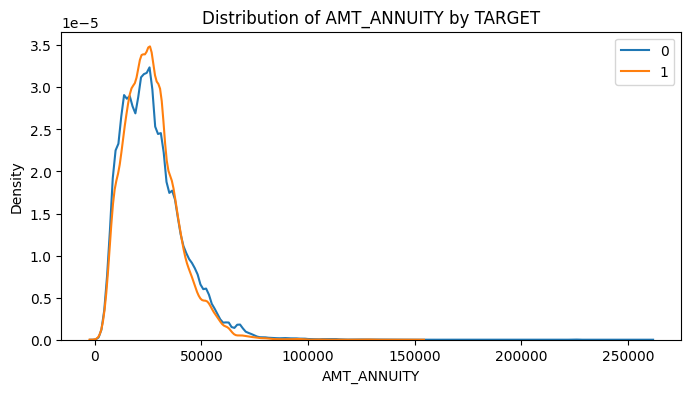

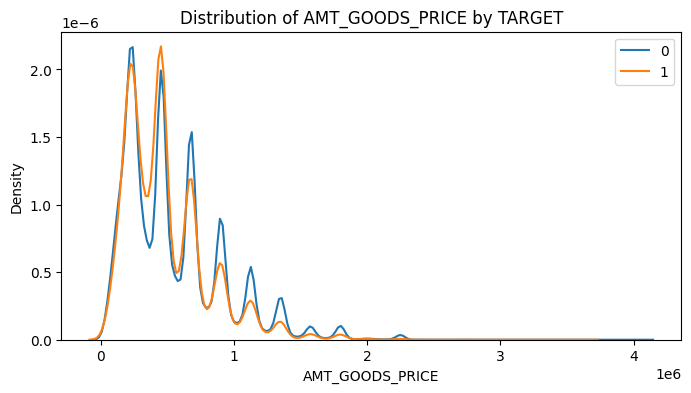

In [ ]:
def plot_density(df, columns):
    """Plots the density of columns in a DataFrame.

    Args:
        df: The input DataFrame.
    """

    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df.loc[df['TARGET'] == 0, col], label='0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, col], label='1')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {col} by TARGET')
        plt.legend()
        plt.show()

# Assuming 'application_train' DataFrame is already loaded as in your provided code
plot_density(application_train, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])

There is a slight trend where individuals with lower values for these variables are more likely to default. \\
All the graphs show overlapping distributions between defaulters and non-defaulters, suggesting these features alone may not be strong predictors of default.

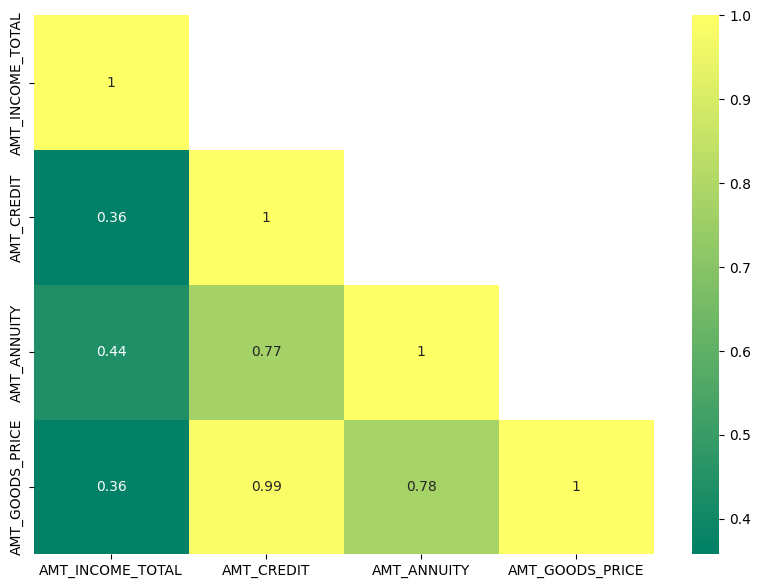

In [ ]:
credit_df = application_train[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]
mask = np.zeros_like(credit_df.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(10,7))
sns.heatmap(credit_df.corr(), annot=True, mask= mask, cmap= "summer")
plt.show()

AMT_CREDIT have really high correlation with AMT_GOODS_PRICE, and these two have relatively high correlation with AMT_ANNUITY.

### Social circle

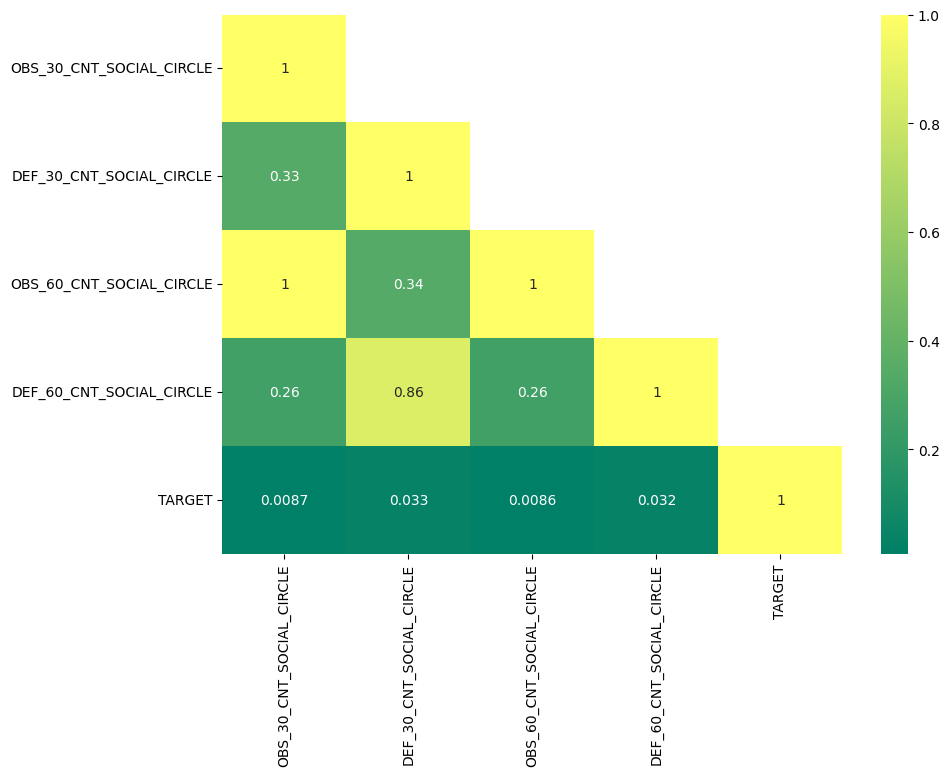

In [ ]:
social_df = application_train[["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 'TARGET']]
mask = np.zeros_like(social_df.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(10,7))
sns.heatmap(social_df.corr(), annot=True, mask= mask, cmap= "summer")
plt.show()

* OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE are 2 identical columns
* DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have high correlation coefficients

### Housing details

In [ ]:
start = application_train.columns.get_loc('APARTMENTS_AVG')
end = application_train.columns.get_loc('EMERGENCYSTATE_MODE')

housing_df = application_train.iloc[:, start : end+1]
print(f'{housing_df.isnull().sum()/housing_df.shape[0]}')

APARTMENTS_AVG                  0.508046
BASEMENTAREA_AVG                0.585409
YEARS_BEGINEXPLUATATION_AVG     0.488120
YEARS_BUILD_AVG                 0.665358
COMMONAREA_AVG                  0.698877
ELEVATORS_AVG                   0.533350
ENTRANCES_AVG                   0.503839
FLOORSMAX_AVG                   0.498083
FLOORSMIN_AVG                   0.678654
LANDAREA_AVG                    0.594003
LIVINGAPARTMENTS_AVG            0.683703
LIVINGAREA_AVG                  0.502372
NONLIVINGAPARTMENTS_AVG         0.694564
NONLIVINGAREA_AVG               0.552598
APARTMENTS_MODE                 0.508046
BASEMENTAREA_MODE               0.585409
YEARS_BEGINEXPLUATATION_MODE    0.488120
YEARS_BUILD_MODE                0.665358
COMMONAREA_MODE                 0.698877
ELEVATORS_MODE                  0.533350
ENTRANCES_MODE                  0.503839
FLOORSMAX_MODE                  0.498083
FLOORSMIN_MODE                  0.678654
LANDAREA_MODE                   0.594003
LIVINGAPARTMENTS

Most of columns containing clients' building information  have narrow IQR and capture many outliers. They contain high proportion of missing values so we may consider drop all.

### Region

In [ ]:
start = application_train.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end = application_train.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_train.iloc[:, start : end+1]
region_df['REGION_RATING_CLIENT'] = application_train['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_train['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = application_train['TARGET']

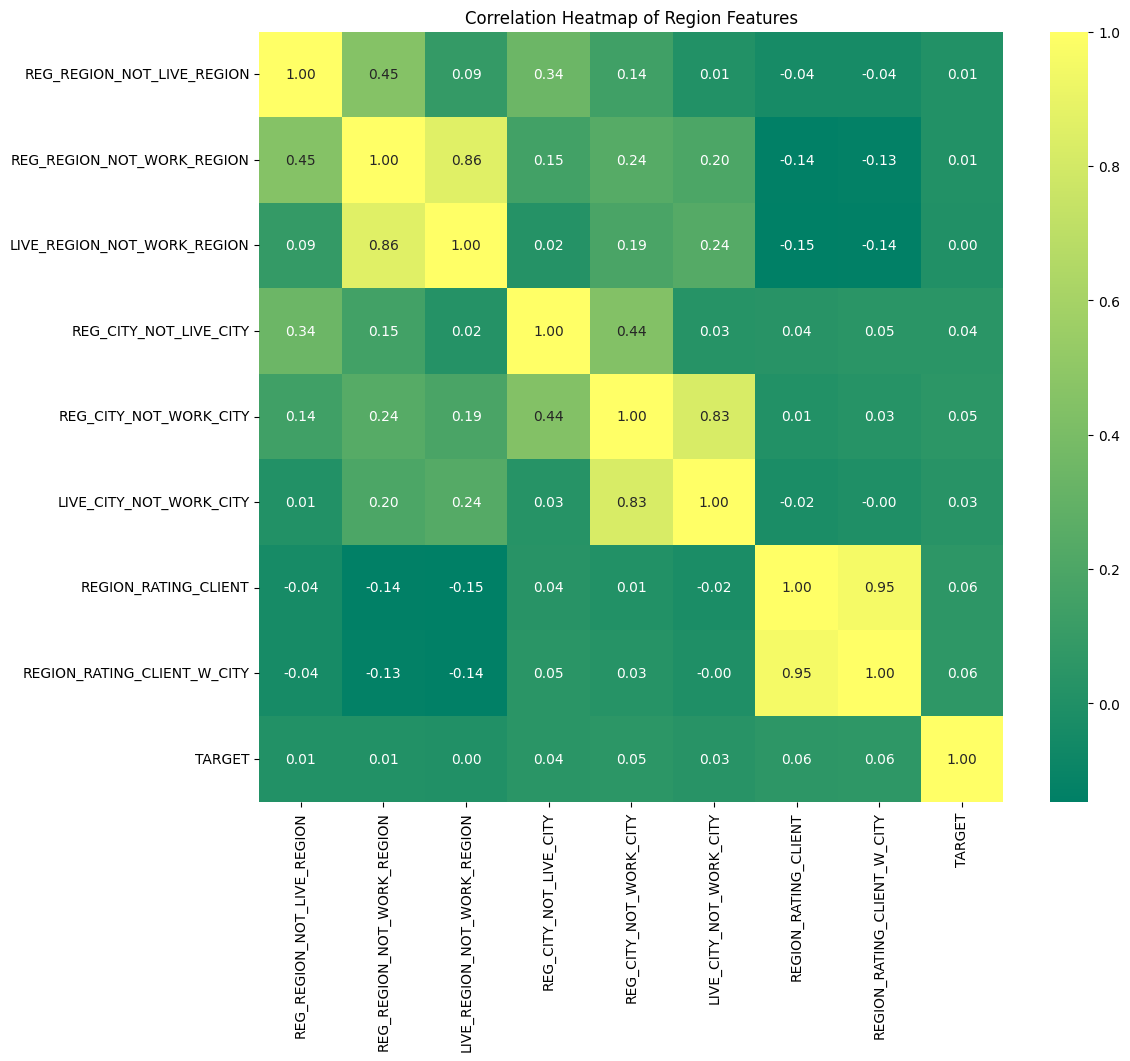

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(region_df.corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Heatmap of Region Features')
plt.show()

Consider dropping 1 in 2 strongly correlated columns such as (REGION_RATING_CLIENT or REGION_RATING_CLIENT_W_CITY),(REG_CITY_NOT_WORK_CITY or LIVE_CITY_NOT_WORK_CITY) and (LIVE_REGION_NOT_WORK_REGION or REG_REGION_NOT_WORK_REGION).

### Exterior sources

In [ ]:
ext_data=application_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()

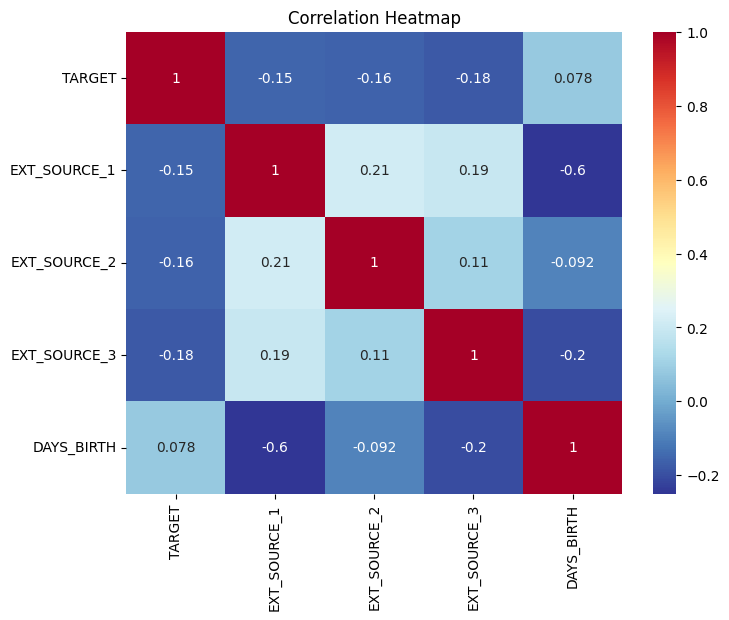

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True)
plt.title('Correlation Heatmap');

* The EXT_SOURCE and TARGET variables are negatively correlated, which can be interpreted to mean that the higher the EXT_SOURCE value, the better the loan repayment.
* In addition, DAYS_BIRTH variables are negatively correlated with EXT_SOURCE_1 variables, so it is assumed that one of these scores is the age of the customer.


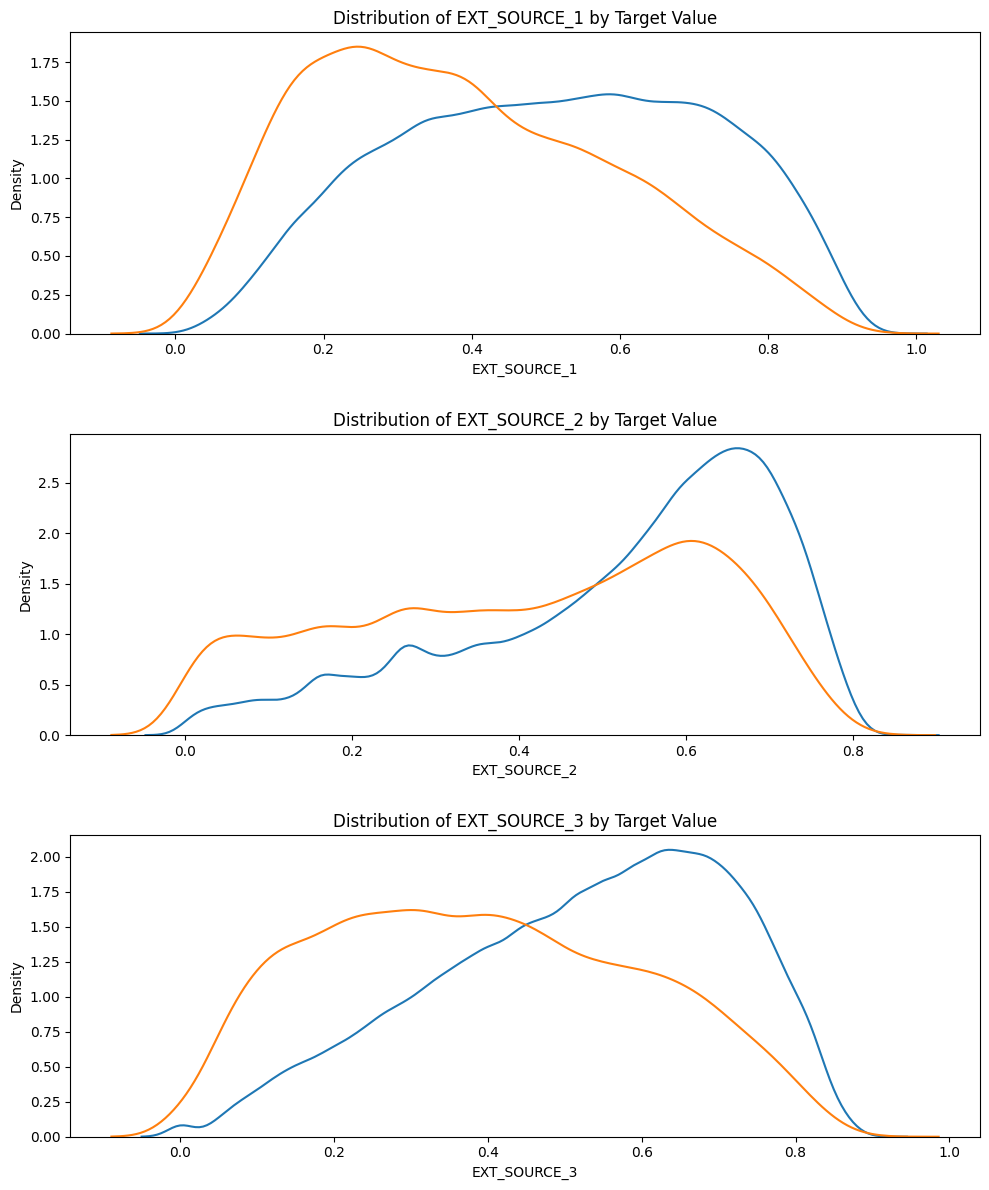

In [ ]:
#Distribution of EXT_SOURCE by TARGET values
plt.figure(figsize=(10,12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)

    sns.kdeplot(application_train.loc[application_train['TARGET']==0,source],label='target==0')
    sns.kdeplot(application_train.loc[application_train['TARGET']==1,source],label='target==1')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');
plt.tight_layout(h_pad=2.5)

* EXT_SOURCE_3 variable seems to differ the most depending on the target value.
* Although the correlation coefficient with target is not very high, the value varies depending on whether the target is 0 or 1, so it can be judged that it is a major variable that affects the model.

### Contact

The default proportion for each value in FLAG_MOBIL
0    0.00
1    8.08
Name: Percent %, dtype: float64
--------------------------------------------------


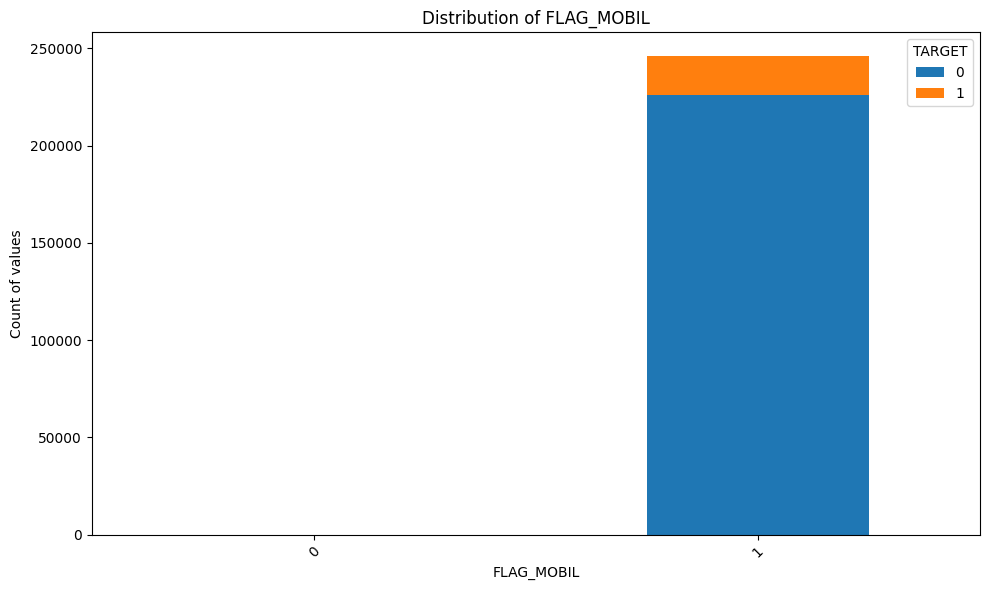

The default proportion for each value in FLAG_EMP_PHONE
0    5.42
1    8.66
Name: Percent %, dtype: float64
--------------------------------------------------


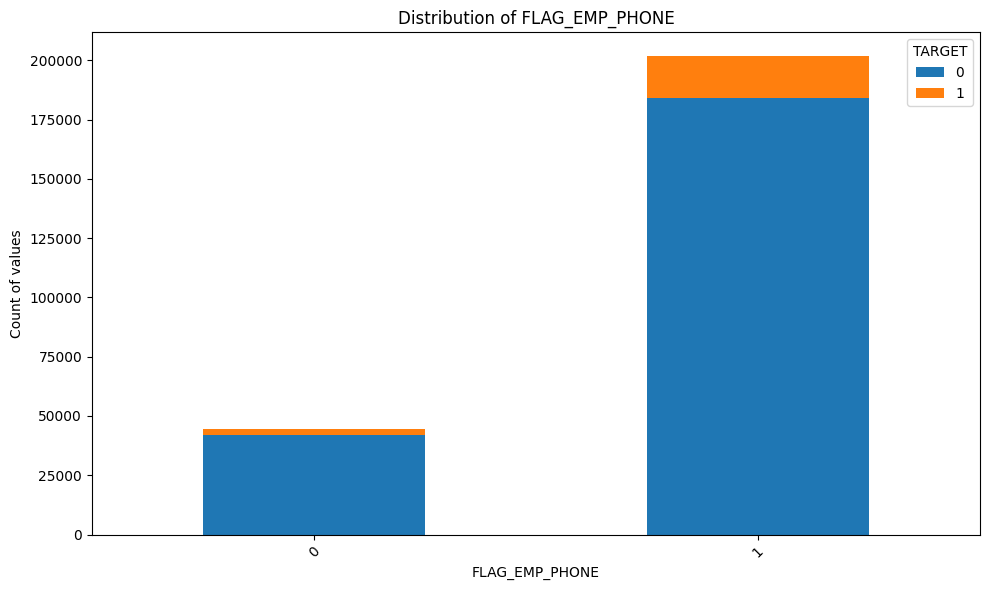

The default proportion for each value in FLAG_WORK_PHONE
0    7.68
1    9.67
Name: Percent %, dtype: float64
--------------------------------------------------


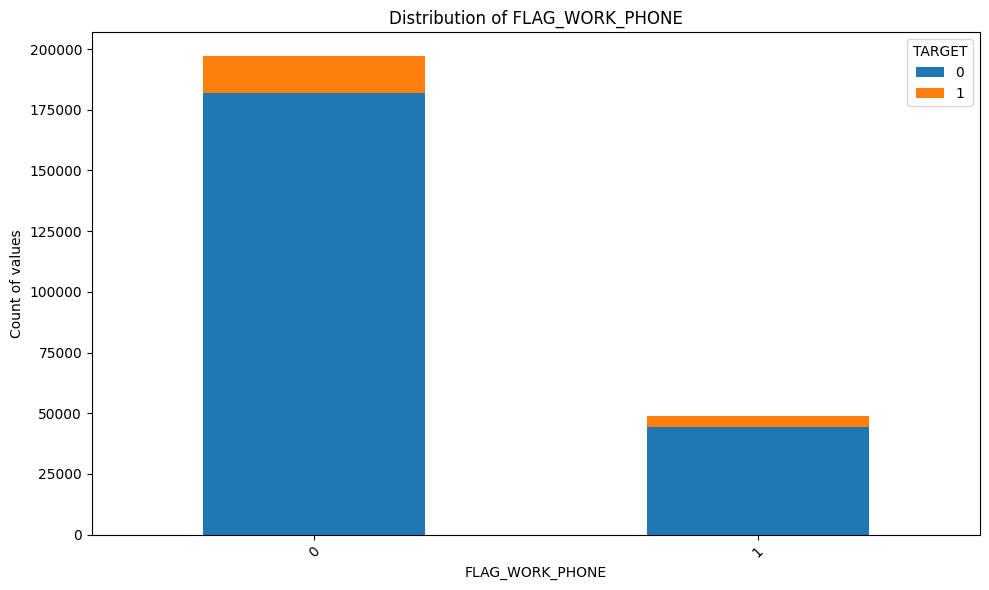

The default proportion for each value in FLAG_CONT_MOBILE
0    7.76
1    8.08
Name: Percent %, dtype: float64
--------------------------------------------------


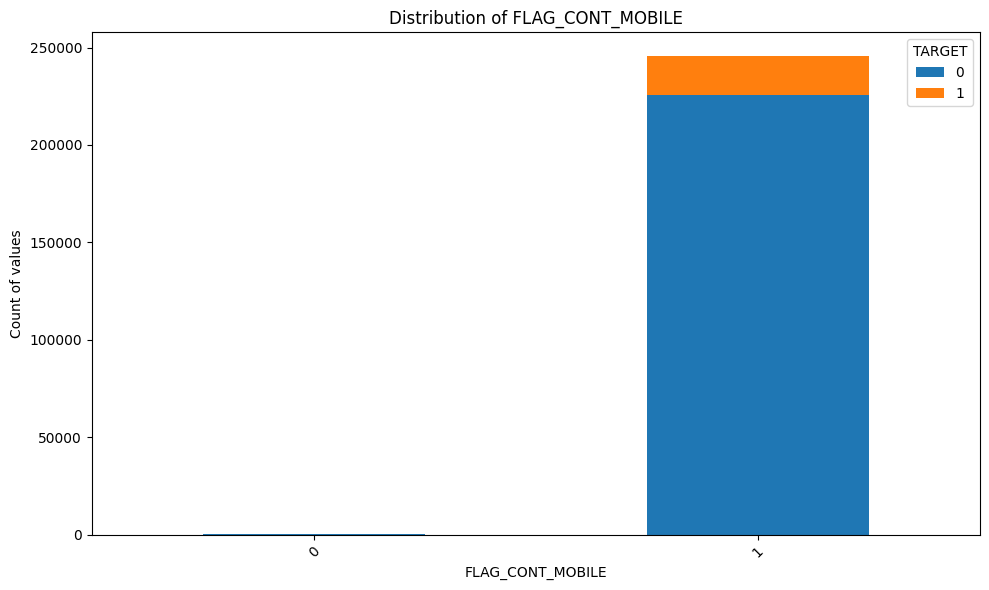

The default proportion for each value in FLAG_PHONE
0    8.48
1    7.05
Name: Percent %, dtype: float64
--------------------------------------------------


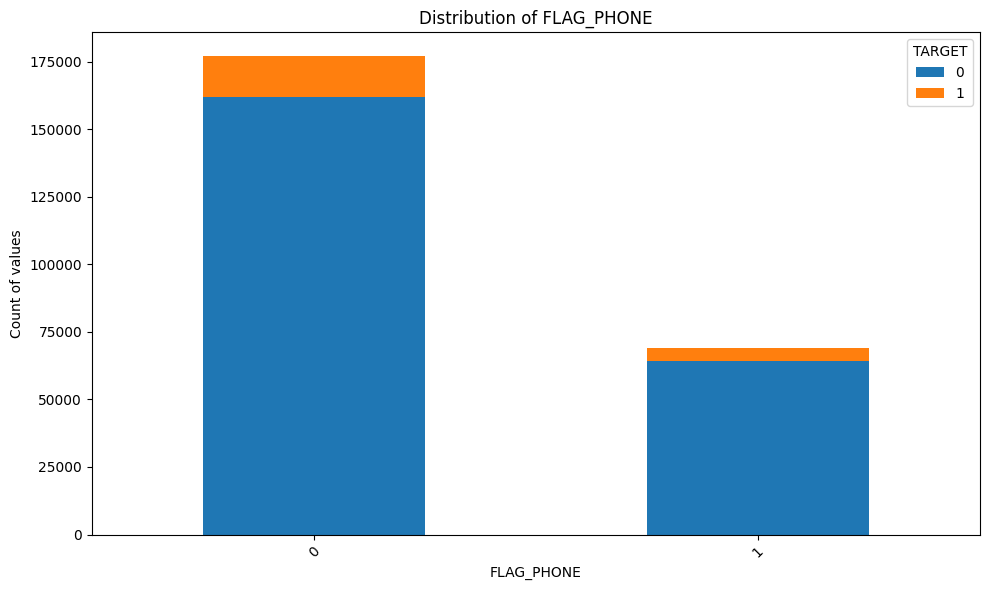

The default proportion for each value in FLAG_EMAIL
0    8.08
1    8.08
Name: Percent %, dtype: float64
--------------------------------------------------


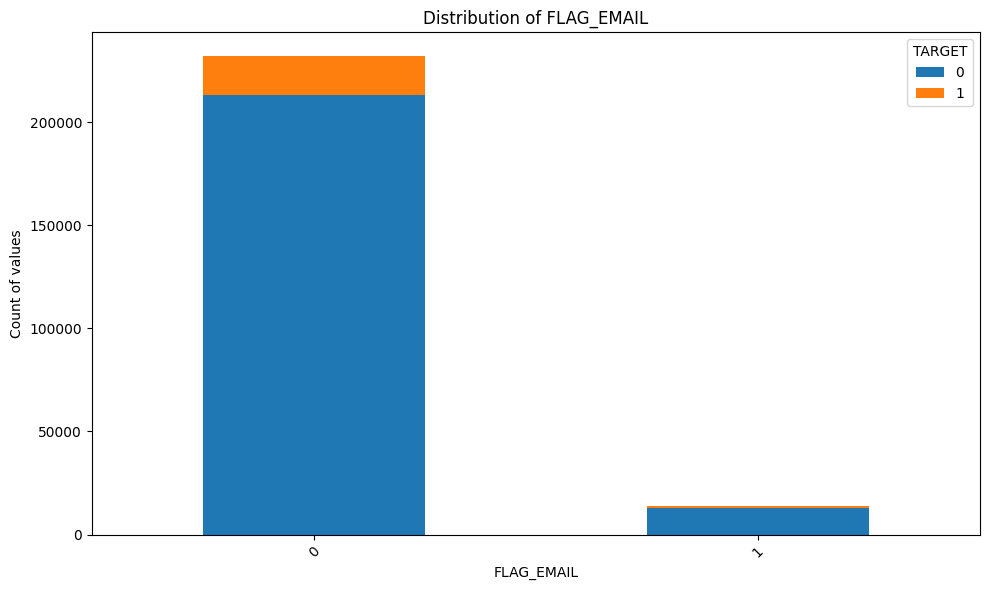

In [ ]:
contact_df = application_train[["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]]
for col in contact_df.columns:
    print(calculate_default_proportion(application_train, col))
    print('-'*50)
    plot_categorical_columns(application_train, col)


In [ ]:
application_train['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    246008
0         1
Name: count, dtype: int64

We should drop this column due to high imbalance and also FLAG_EMAIL as the defaulter rate in each group are the same.

### Domain knowledge features

* CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
* ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
* CREDIT_TERM: the length of the payment in months since the annuity is the monthly amount due
* DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [ ]:
flag_df =dummy_df

In [ ]:
train_domain = application_train.copy()
test_domain = test_df.copy()


train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

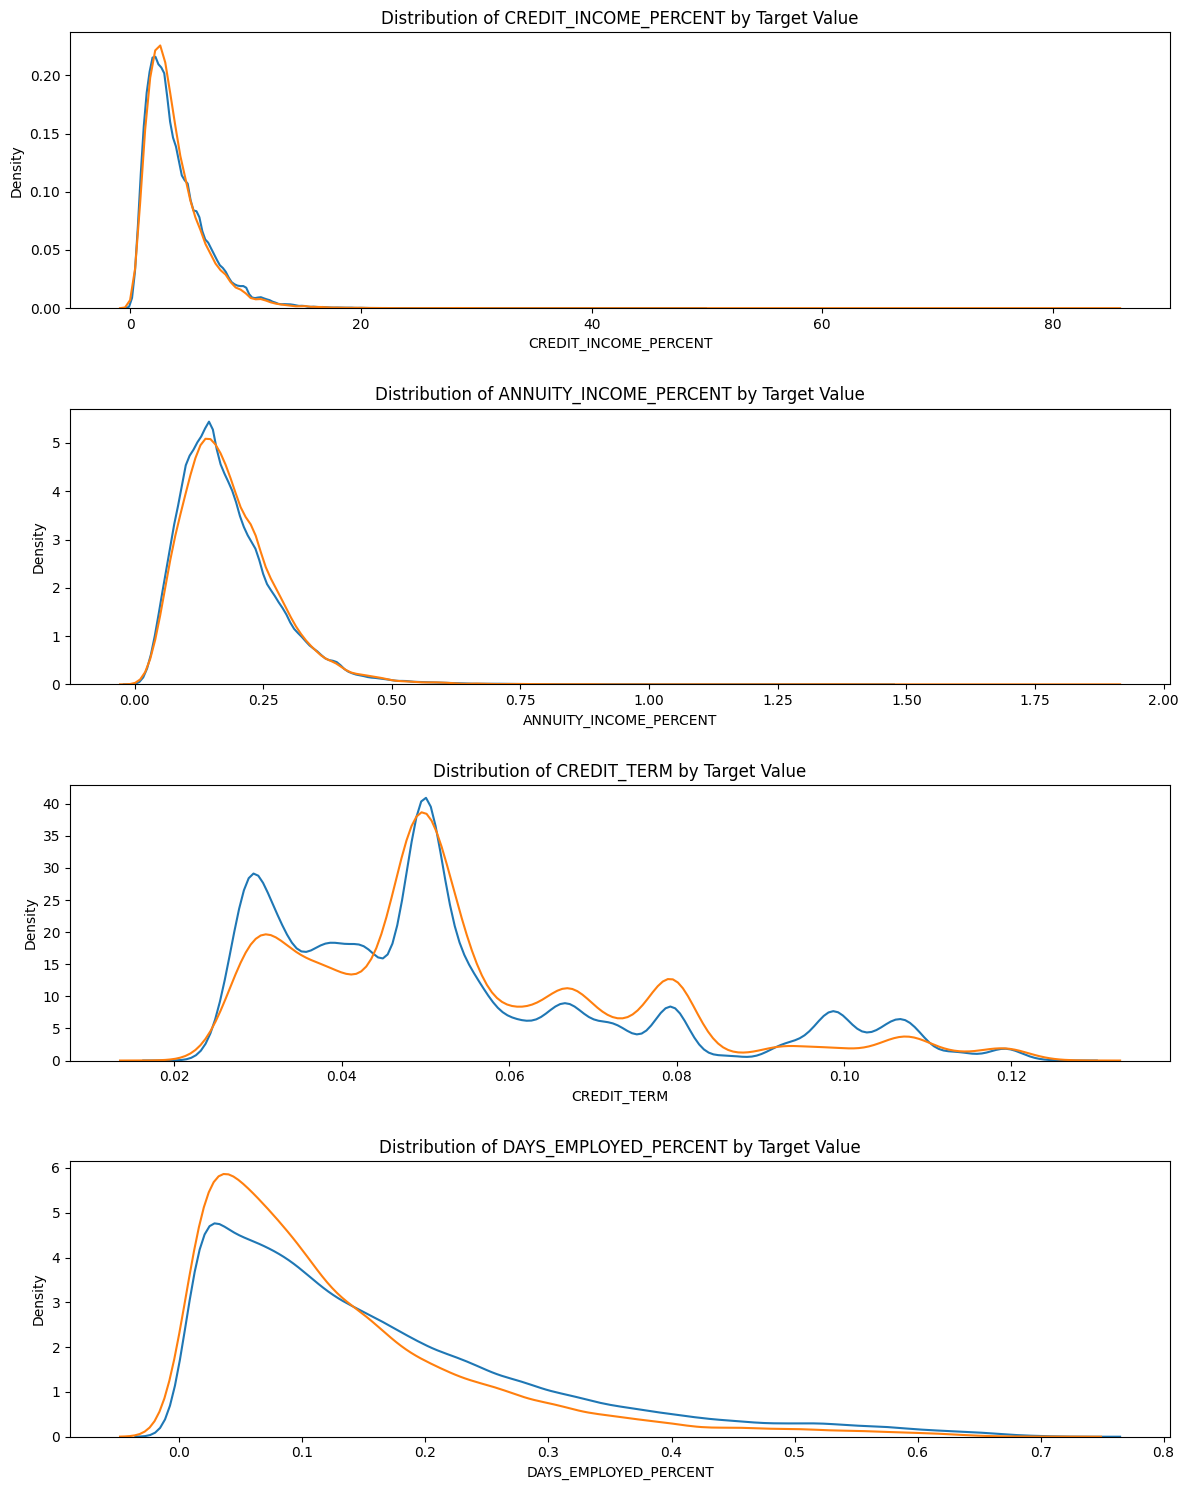

In [ ]:
plt.figure(figsize=(12,15))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(train_domain.loc[train_domain['TARGET']==0,feature],label='target==0')
    sns.kdeplot(train_domain.loc[train_domain['TARGET']==1,feature],label='target==1')

    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature);
    plt.ylabel('Density');

plt.tight_layout(h_pad=2.5)

- CREDIT_TERM and DAYS_EMPLOYED_PERCENT show the most potential for distinguishing between the target groups, as there are visible differences in the distributions.
- CREDIT_INCOME_PERCENT and ANNUITY_INCOME_PERCENT exhibit significant overlap between target groups, indicating weaker predictive power.

### Flag document

In [ ]:
start = application_train.columns.get_loc('FLAG_DOCUMENT_2')
end = application_train.columns.get_loc('FLAG_DOCUMENT_21')

flag_docu_df = application_train.iloc[:, start : end+1]

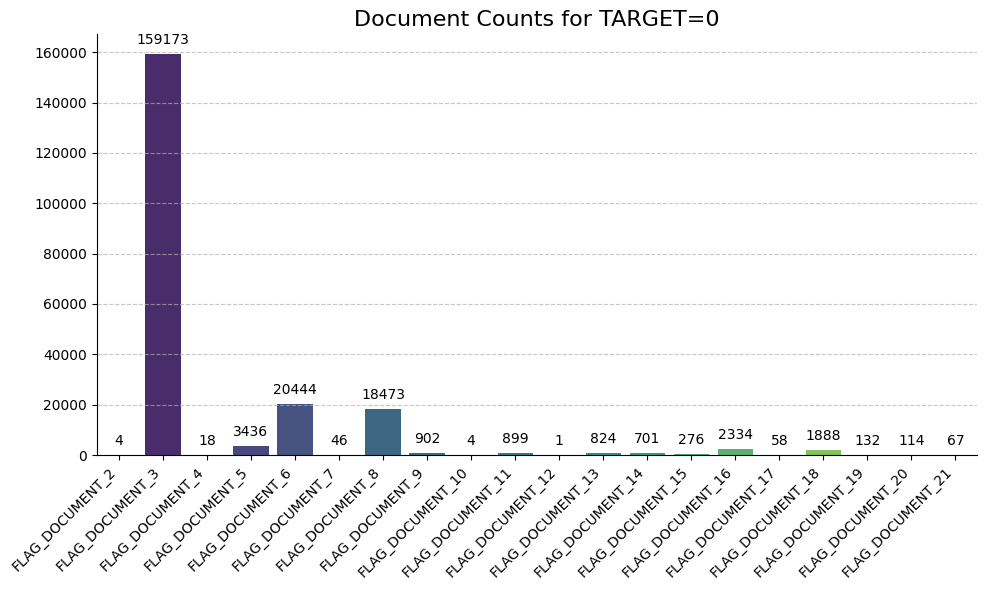

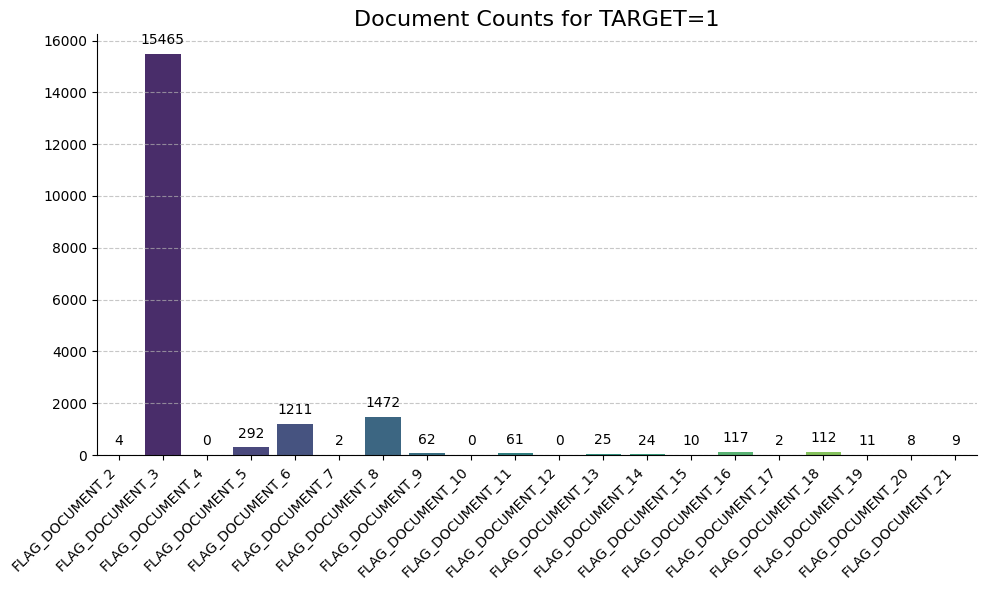

In [ ]:
flag_docu_df['TARGET'] = application_train['TARGET']

def plot_document_counts(df, target_value):
    filtered_df = df[df['TARGET'] == target_value]
    document_counts = filtered_df.drop(columns=['TARGET']).sum()

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Use a color palette for better visual distinction
    colors = sns.color_palette("viridis", len(document_counts))

    ax = sns.barplot(x=document_counts.index, y=document_counts.values, palette=colors)

    plt.title(f"Document Counts for TARGET={target_value}", fontsize=16)
    plt.xlabel("")

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10, )

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Add labels to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Create plots for TARGET=0 and TARGET=1
plot_document_counts(flag_docu_df, 0)
plot_document_counts(flag_docu_df, 1)

For both TARGET = 0 and TARGET = 1 document 3 is the most provided compared to other documents. We may consider to drop the few or not provided document